## Contents
#### Importing libraries and data
#### Crosstabs
#### 4:10 Task
#### Part 1, # 3: Segment according to region and create 'Region' column
#### Finding value count for customers, and counts and percentage high and low spenders in each region
#### Finding the standard deviation of high spender percentage
#### Ordering regions by percentage of high spenders
#### Creating bar chart for high spenders by region
#### Part 1, # 4: Create exclusion flag for low-activity customers
#### Part 1, # 5: Creating customer profiles
#### Creating Age flag
#### Creating family size flag
#### Creating income flag
#### Creating 'Profile' column with demographic profiles
#### Part 1, # 6: Create an appropriate visualization to show the distribution of profiles
#### Part 1, # 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
#### Part 1, # 7: Compare your customer profiles with regions and departments
#### Analysis of Married_Middleincome_Sfamily_Younger profile
#### Analysis of Married_Upperincome_Sfamily_Older profile
#### Analysis of Single_Lowspender_Lowincome profile
#### Analysis of Married_Lowerincome_Lfamily_Younger profile
#### Analysis of Married_Upperincome_Lfamily_MiddleAge profile
#### Analysis of Younger_LivingwParents profile
#### Analysis of DivWid Lowerincome Nochildren Older profile
#### Analysis of Single_MiddleAged_HighSpender profile
#### Analysis of Single_Upperincome_Nochildren_Younger profile

### Importing libraries and data

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# defining path
path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'

In [3]:
# Importing customers
df_ords_prods_customers = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.csv'), index_col = 0)

### Crosstabs

In [4]:
# Creating crosstab
crosstab = pd.crosstab(df_ords_prods_customers['days_since_prior_order'], df_ords_prods_customers['order_number'], dropna = False)

In [5]:
# Copying crosstab to clipboard
crosstab.to_clipboard()

## 4:10 Task

## Part 1, # 3: Segment according to region and create 'Region' column. I am using my own regions rather than the ones suggested by the Census Bureau website.

In [6]:
df_ords_prods_customers.loc[df_ords_prods_customers['State'].isin(['California','Oregon','Washington','Alaska', 'Hawaii']), 'Region'] = 'West Coast'

In [7]:
df_ords_prods_customers.loc[df_ords_prods_customers['State'].isin(['Idaho','Montana','Wyoming','Nevada', 'Utah','Colorado','Arizona','New Mexico']), 'Region'] = 'Mountain West'

In [8]:
df_ords_prods_customers.loc[df_ords_prods_customers['State'].isin(['Alabama','Georgia','Florida','South Carolina', 'North Carolina','Virginia']), 'Region'] = 'Southeast'

In [9]:
df_ords_prods_customers.loc[df_ords_prods_customers['State'].isin(['North Dakota','South Dakota','Nebraska','Kansas', 'Minnesota','Iowa','Missouri']), 'Region'] = 'Plains'

In [10]:
df_ords_prods_customers.loc[df_ords_prods_customers['State'].isin(['Wisconsin','Illinois','Michigan','Indiana', 'Ohio','Kentucky']), 'Region'] = 'North Central'

In [11]:
df_ords_prods_customers.loc[df_ords_prods_customers['State'].isin(['Texas','Oklahoma','Arkansas','Louisiana', 'Mississippi','Tennessee']), 'Region'] = 'South Central'

In [12]:
df_ords_prods_customers.loc[df_ords_prods_customers['State'].isin(['Maryland','District of Columbia','Delaware','Pennsylvania', 'New Jersey','New York','West Virginia']), 'Region'] = 'Mid-Atlantic'

In [13]:
df_ords_prods_customers.loc[df_ords_prods_customers['State'].isin(['Connecticut','Rhode Island','Massachusetts','Vermont', 'New Hampshire','Maine']), 'Region'] = 'New England'

In [14]:
# Checking columns
df_ords_prods_customers

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surname,Gender,State,Age,date_joined,Number_dependants,family_status,income,Region
0,2539329,1,1,2,8,NaN,1,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
1,2398795,1,2,3,7,15.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
2,473747,1,3,3,12,21.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
3,2254736,1,4,4,7,29.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
4,431534,1,5,4,15,28.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23049995,2543114,72486,2,0,10,30.0,0,46235,3,0,Darks Liquid Laundry Detergent,75,17,12.5,Mid-range product,Busiest days,Busiest period,Most orders,5,New customer,12.500000,High spender,22.000000,Non-frequent customer,Steven,Dunn,Male,Indiana,50,7/14/2019,2,married,162789,North Central
23049996,2876636,72486,5,0,13,14.0,0,46235,3,1,Darks Liquid Laundry Detergent,75,17,12.5,Mid-range product,Busiest days,Busiest period,Most orders,5,New customer,12.500000,High spender,22.000000,Non-frequent customer,Steven,Dunn,Male,Indiana,50,7/14/2019,2,married,162789,North Central
23049997,876147,129743,3,1,15,24.0,0,46235,2,0,Darks Liquid Laundry Detergent,75,17,12.5,Mid-range product,Busiest days,Busiest period,Most orders,3,New customer,12.500000,High spender,24.000000,Non-frequent customer,Matthew,Hurley,Male,Wisconsin,51,6/15/2018,0,single,52258,North Central
23049998,1970552,47454,1,5,10,NaN,1,20112,3,0,Garbage Bags Small - 30 CT,60,17,5.3,Mid-range product,Regularly busy,Busiest period,Most orders,1,New customer,5.300000,Low spender,NaN,NaN,Sharon,Zhang,Female,New Hampshire,43,11/3/2017,1,married,41303,New England


In [15]:
# Checking values for new column
df_ords_prods_customers['Region'].value_counts(dropna = False)

Region
Mountain West    3612368
Plains           3159639
Mid-Atlantic     3134888
Southeast        2742391
South Central    2717805
New England      2696497
North Central    2686613
West Coast       2295370
Name: count, dtype: int64

In [16]:
# Finding value counts for new column
df_ords_prods_customers['Spending_flag'].value_counts(dropna = False)

Spending_flag
Low spender     22576572
High spender      468999
Name: count, dtype: int64

In [17]:
# Group the DataFrame by region
df_grouped_by_region = df_ords_prods_customers.groupby(['Region','Spending_flag'])['Spending_flag'].count()

In [18]:
# Create a new DataFrame to store the results
df_results = pd.DataFrame(columns=['Low Spenders', 'High Spenders'])

In [19]:
df_ords_prods_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surname,Gender,State,Age,date_joined,Number_dependants,family_status,income,Region
0,2539329,1,1,2,8,NaN,1,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
1,2398795,1,2,3,7,15.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
2,473747,1,3,3,12,21.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
3,2254736,1,4,4,7,29.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
4,431534,1,5,4,15,28.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast


In [20]:
df_grouped_by_region

Region         Spending_flag
Mid-Atlantic   High spender       65066
               Low spender      3069822
Mountain West  High spender       72499
               Low spender      3539869
New England    High spender       56784
               Low spender      2639713
North Central  High spender       60376
               Low spender      2626237
Plains         High spender       61400
               Low spender      3098239
South Central  High spender       48932
               Low spender      2668873
Southeast      High spender       55061
               Low spender      2687330
West Coast     High spender       48881
               Low spender      2246489
Name: Spending_flag, dtype: int64

In [21]:
# Create a new DataFrame to store the results
df_spending_region = df_ords_prods_customers[['Region','Spending_flag']]

In [22]:
# Finding value count for customers, and high and low spenders in each region
regions = df_ords_prods_customers['Region'].unique()

In [23]:
region_counts = df_ords_prods_customers['Region'].value_counts()

In [24]:
region_counts

Region
Mountain West    3612368
Plains           3159639
Mid-Atlantic     3134888
Southeast        2742391
South Central    2717805
New England      2696497
North Central    2686613
West Coast       2295370
Name: count, dtype: int64

In [25]:
# Calculating regional percentages
region_counts = df_ords_prods_customers['Region'].value_counts()

# Calculate the total count of all regions
total_count = region_counts.sum()

# Calculate the percentage for each region
region_percentages = (region_counts / total_count) * 100

region_percentages

Region
Mountain West    15.674890
Plains           13.710396
Mid-Atlantic     13.602996
Southeast        11.899861
South Central    11.793177
New England      11.700717
North Central    11.657828
West Coast        9.960135
Name: count, dtype: float64

In [26]:
lows = []
highs = []

In [27]:
for region in regions:
    region_df = df_spending_region.loc[df_spending_region['Region']==region]
    counts = region_df['Spending_flag'].value_counts()
    total = counts.sum()
    low = counts['Low spender']
    high = counts['High spender']
    low_pct = low/total
    high_pct = high/total
    lows.append(low_pct)
    highs.append(high_pct)
    print(region)
    print(low_pct)
    print(high_pct)
    print()

Southeast
0.9799222649140841
0.020077735085915902

North Central
0.9775270945238484
0.02247290547615157

South Central
0.9819957649647417
0.01800423503525823

Mountain West
0.9799303393231255
0.02006966067687456

Plains
0.9805674002631313
0.019432599736868676

New England
0.9789415675226043
0.021058432477395674

West Coast
0.9787045225824159
0.021295477417584092

Mid-Atlantic
0.9792445535534284
0.020755446446571617



In [28]:
percentage_df = pd.DataFrame({'Region':regions, 'Low spender pct': lows, 'High spender pct': highs})

In [29]:
percentage_df

,Region,Low spender pct,High spender pct
0,Southeast,0.979922,0.020078
1,North Central,0.977527,0.022473
2,South Central,0.981996,0.018004
3,Mountain West,0.979930,0.020070
4,Plains,0.980567,0.019433
5,New England,0.978942,0.021058
6,West Coast,0.978705,0.021295
7,Mid-Atlantic,0.979245,0.020755


In [30]:
highs

[0.020077735085915902,
 0.02247290547615157,
 0.01800423503525823,
 0.02006966067687456,
 0.019432599736868676,
 0.021058432477395674,
 0.021295477417584092,
 0.020755446446571617]

In [31]:
regions

array(['Southeast', 'North Central', 'South Central', 'Mountain West',
       'Plains', 'New England', 'West Coast', 'Mid-Atlantic'],
      dtype=object)

In [32]:
# Finding the standard deviation of high spender percentage
standard_deviation = percentage_df['High spender pct'].std()

In [33]:
print("Standard Deviation:", standard_deviation)

Standard Deviation: 0.0013388205819980519


In [34]:
#Ordering regions by percentage of high spenders
sorted_counts = percentage_df['High spender pct'].value_counts().sort_index(ascending=False)

In [35]:
percentage_df = percentage_df.sort_values(by='High spender pct', ascending=False)

<Axes: xlabel='High spender pct'>

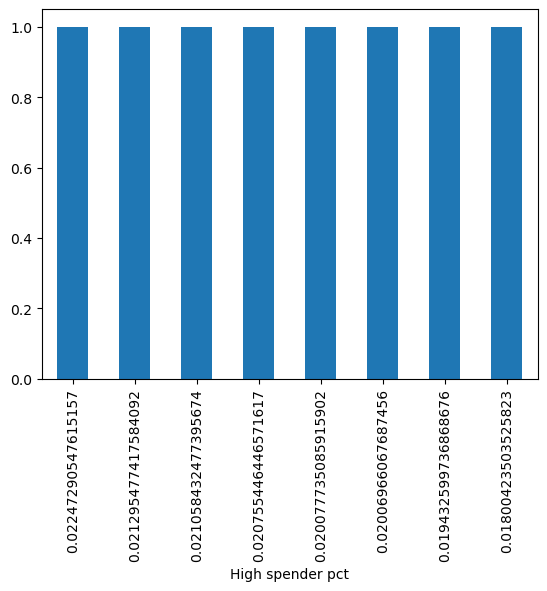

In [36]:
# Creating descending bar chart
sorted_counts.plot(kind='bar')

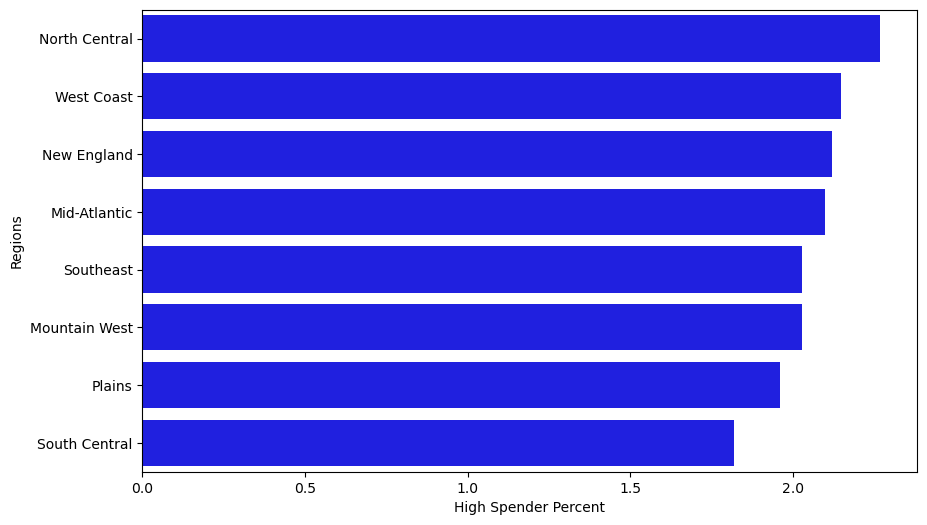

In [37]:
# Revising the chart for better readability
fake = pd.DataFrame({'cat': ['North Central', 'West Coast', 'New England', 'Mid-Atlantic', 'Southeast', 'Mountain West', 'Plains', 'South Central'], 'val': [2.27, 2.15, 2.12, 2.10, 2.03, 2.03, 1.96, 1.82]})

# Set the figure size to ensure all titles and labels are visible
plt.figure(figsize=(10, 6))  

# Create the bar chart
ax = sns.barplot(x='val', y='cat', data=fake, color='blue')
ax.set_xlabel("High Spender Percent")
ax.set_ylabel("Regions")
ax.set_yticklabels(['North Central', 'West Coast', 'New England', 'Mid-Atlantic', 'Southeast', 'Mountain West', 'Plains', 'South Central'])

# Specify the path and filename
path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'High_spenders_by_region.png'

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'High_spenders_by_region.png'))

plt.show()


### Part 1, # 3 conclusion: There is very little difference in the percentage of high spenders depending on region; the standard deviation by region is .00135, which shows no significant variation.

## Part 1, # 4: Create exclusion flag for low-activity customers

In [38]:
# Creating exclusion flag
df_ords_prods_customers['exclusion_flag'] = df_ords_prods_customers['max_order'] < 5

In [39]:
df_ords_prods_customers['exclusion_flag'] = df_ords_prods_customers['exclusion_flag'].map({True: 'Yes', False: 'No'})

In [40]:
# Creating df without low-activity customers
df_ords_prods_customers_filtered = df_ords_prods_customers[df_ords_prods_customers['exclusion_flag'] != 'Yes']

In [41]:
# Checking new df
df_ords_prods_customers_filtered

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surname,Gender,State,Age,date_joined,Number_dependants,family_status,income,Region,exclusion_flag
0,2539329,1,1,2,8,NaN,1,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,No
1,2398795,1,2,3,7,15.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,No
2,473747,1,3,3,12,21.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,No
3,2254736,1,4,4,7,29.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,No
4,431534,1,5,4,15,28.0,0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23049988,1219160,57909,3,2,14,1.0,0,32665,1,1,Organic Ezekiel 49 Bread Cinnamon Raisin,112,3,12.4,Mid-range product,Regularly busy,Busiest period,Most orders,5,New customer,12.400000,High spender,2.000000,Frequent customer,Frank,Howell,Male,New Hampshire,44,10/12/2017,3,married,157024,New England,No
23049989,2891581,57909,4,3,10,1.0,0,32665,1,1,Organic Ezekiel 49 Bread Cinnamon Raisin,112,3,12.4,Mid-range product,Least busy days,Busiest period,Most orders,5,New customer,12.400000,High spender,2.000000,Frequent customer,Frank,Howell,Male,New Hampshire,44,10/12/2017,3,married,157024,New England,No
23049990,3060811,57909,5,5,12,2.0,0,32665,1,1,Organic Ezekiel 49 Bread Cinnamon Raisin,112,3,12.4,Mid-range product,Regularly busy,Busiest period,Most orders,5,New customer,12.400000,High spender,2.000000,Frequent customer,Frank,Howell,Male,New Hampshire,44,10/12/2017,3,married,157024,New England,No
23049995,2543114,72486,2,0,10,30.0,0,46235,3,0,Darks Liquid Laundry Detergent,75,17,12.5,Mid-range product,Busiest days,Busiest period,Most orders,5,New customer,12.500000,High spender,22.000000,Non-frequent customer,Steven,Dunn,Male,Indiana,50,7/14/2019,2,married,162789,North Central,No


## Part 1, # 5: Creating customer profiles

In [42]:
# Checking variable values
df_ords_prods_customers_filtered['Number_dependants'].value_counts(dropna = False)

Number_dependants
3    5539356
0    5521949
2    5504467
1    5492614
Name: count, dtype: int64

In [43]:
df_ords_prods_customers_filtered.describe()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,Avg_price_paid,Avg_days_since_order,Age,Number_dependants,income
count,2.205839e+07,2.205839e+07,2.205839e+07,2.205839e+07,2.205839e+07,2.089926e+07,2.205839e+07,2.205839e+07,2.205839e+07,2.205839e+07,2.205839e+07,2.205839e+07,2.205839e+07,2.205839e+07,2.205839e+07,2.205839e+07,2.205839e+07,2.205839e+07,2.205839e+07
mean,1.710392e+06,1.028940e+05,1.815608e+01,2.719391e+00,1.339647e+01,1.072648e+01,5.254800e-02,2.590671e+04,8.207924e+00,6.376890e-01,7.131143e+01,9.340828e+00,7.879858e+00,3.503252e+01,1.061435e+01,1.091100e+01,4.945739e+01,1.501452e+00,9.969301e+04
std,9.874029e+05,5.948388e+04,1.782815e+01,2.095681e+00,4.249023e+00,8.522422e+00,2.231294e-01,1.398619e+04,6.973507e+00,4.806680e-01,3.810602e+01,6.185997e+00,4.243317e+00,2.506276e+01,3.937407e+01,5.644655e+00,1.848638e+01,1.119334e+00,4.201224e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.553500e+05,5.131500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,0.000000e+00,1.391100e+04,3.000000e+00,0.000000e+00,2.400000e+01,4.000000e+00,4.400000e+00,1.500000e+01,7.428054e+00,6.733781e+00,3.300000e+01,0.000000e+00,6.783300e+04
50%,1.710464e+06,1.025130e+05,1.200000e+01,2.000000e+00,1.300000e+01,7.000000e+00,0.000000e+00,2.557900e+04,6.000000e+00,1.000000e+00,8.300000e+01,7.000000e+00,7.500000e+00,2.900000e+01,7.910600e+00,9.549451e+00,4.900000e+01,2.000000e+00,9.693900e+04
75%,2.565332e+06,1.543490e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,0.000000e+00,3.829300e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.900000e+01,8.382759e+00,1.420000e+01,6.500000e+01,3.000000e+00,1.280490e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.000000e+00,4.968300e+04,1.430000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,4.974711e+03,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [44]:
# Checking variable values
df_ords_prods_customers_filtered['family_status'].value_counts(dropna = False)

family_status
married                             15483056
single                               3635584
divorced/widowed                     1886365
living with parents and siblings     1053381
Name: count, dtype: int64

In [45]:
# Calculate the counts for each category in the 'family status' column
family_status_counts = df_ords_prods_customers_filtered['family_status'].value_counts()

# Calculate the percentages
family_status_percentages = (family_status_counts / family_status_counts.sum()) * 100

In [46]:
family_status_percentages

family_status
married                             70.191246
single                              16.481641
divorced/widowed                     8.551691
living with parents and siblings     4.775422
Name: count, dtype: float64

In [47]:
# Group the DataFrame by 'family status' and calculate the mean of 'Avg_price_paid'
average_price_by_family_status = df_ords_prods_customers_filtered.groupby('family_status')['Avg_price_paid'].mean()

In [48]:
average_price_by_family_status

family_status
divorced/widowed                    10.905814
living with parents and siblings    10.240286
married                             10.704643
single                              10.186966
Name: Avg_price_paid, dtype: float64

In [49]:
# Calculate the total amount paid for each order (price x order_number) using .loc
df_ords_prods_customers_filtered['total_amount_paid'] = df_ords_prods_customers_filtered['prices'] * df_ords_prods_customers_filtered['order_number']

# Group the DataFrame by 'family status' and 'user_id,' and calculate the sum of 'total_amount_paid'
average_total_amount_by_family_status = df_ords_prods_customers_filtered.groupby(['family_status', 'user_id'])['total_amount_paid'].sum()

# Group by 'family status' and calculate the mean of the sums for each user
average_total_amount_by_family_status = average_total_amount_by_family_status.groupby('family_status').mean()

/var/folders/v0/xrbnqqfs3715z2hj7f5pvkf80000gn/T/ipykernel_2861/2378996070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_customers_filtered['total_amount_paid'] = df_ords_prods_customers_filtered['prices'] * df_ords_prods_customers_filtered['order_number']


In [50]:
average_total_amount_by_family_status

family_status
divorced/widowed                    19837.272433
living with parents and siblings    20218.047030
married                             19413.272790
single                              19604.864881
Name: total_amount_paid, dtype: float64

In [51]:
# Checking variable values
df_ords_prods_customers_filtered['Spending_flag'].value_counts(dropna = False)

Spending_flag
Low spender     21625130
High spender      433256
Name: count, dtype: int64

In [52]:
# Check Family status and Spending flag
df_family_status_grouped_by_spending = df_ords_prods_customers_filtered.groupby(['family_status','Spending_flag'])['Spending_flag'].count()

In [53]:
# Check Family status flag and Spending flag
df_family_status_grouped_by_spending = df_ords_prods_customers_filtered.groupby(['family_status','Spending_flag'])['Spending_flag'].count()

In [54]:
# Create a new DataFrame to store the results
df_family_status_results = pd.DataFrame(columns=['Low Spenders', 'High Spenders'])

In [55]:
# Calculate percentages within each income group
df_family_status_results = df_family_status_grouped_by_spending.unstack().div(df_family_status_grouped_by_spending.unstack().sum(axis=1), axis=0).fillna(0)

In [56]:
# Rename the columns
df_family_status_results.columns = ['High Spenders', 'Low Spenders']

In [57]:
df_family_status_results *= 100

In [58]:
# Sort the DataFrame by the first column in descending order
df_family_status_results = df_family_status_results.sort_values(by='High Spenders', ascending=False)


In [59]:
df_family_status_results

,High Spenders,Low Spenders
family_status,,
married,1.990040,98.009960
single,1.932372,98.067628
living with parents and siblings,1.876814,98.123186
divorced/widowed,1.861464,98.138536


#### Creating Age flag

In [60]:
# Creating Age flag
df_ords_prods_customers_filtered.loc[df_ords_prods_customers_filtered['Age'] <= 39, 'Age_flag'] = 'Younger'

/var/folders/v0/xrbnqqfs3715z2hj7f5pvkf80000gn/T/ipykernel_2861/3983078904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_customers_filtered.loc[df_ords_prods_customers_filtered['Age'] <= 39, 'Age_flag'] = 'Younger'


In [61]:
df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['Age'] >= 40) & (df_ords_prods_customers_filtered['Age'] <= 60), 'Age_flag'] = 'Middle Age'

In [62]:
df_ords_prods_customers_filtered.loc[df_ords_prods_customers_filtered['Age'] > 60, 'Age_flag'] = 'Older'

In [63]:
# Checking variable values
df_ords_prods_customers_filtered['Age_flag'].value_counts(dropna = False)

Age_flag
Younger       7606244
Middle Age    7250242
Older         7201900
Name: count, dtype: int64

In [64]:
# Calculate the counts for each category in the 'Age_flag' column
Age_flag_counts = df_ords_prods_customers_filtered['Age_flag'].value_counts()

# Calculate the percentages
Age_flag_percentages = (Age_flag_counts / Age_flag_counts.sum()) * 100

Age_flag_percentages

Age_flag
Younger       34.482323
Middle Age    32.868416
Older         32.649261
Name: count, dtype: float64

In [65]:
# Group the DataFrame by 'Age_flag' and calculate the mean of 'Avg_price_paid'
average_price_by_Age_flag = df_ords_prods_customers_filtered.groupby('Age_flag')['Avg_price_paid'].mean()

average_price_by_Age_flag

Age_flag
Middle Age    10.625775
Older         10.657955
Younger       10.562173
Name: Avg_price_paid, dtype: float64

In [66]:
# Calculate the total amount paid for each order (price x order_number) using .loc
df_ords_prods_customers_filtered['total_amount_paid'] = df_ords_prods_customers_filtered['prices'] * df_ords_prods_customers_filtered['order_number']

# Group the DataFrame by 'Age_flag' and 'user_id,' and calculate the sum of 'total_amount_paid'
average_total_amount_by_Age_flag = df_ords_prods_customers_filtered.groupby(['Age_flag', 'user_id'])['total_amount_paid'].sum()

# Group by 'family status' and calculate the mean of the sums for each user
average_total_amount_by_Age_flag = average_total_amount_by_Age_flag.groupby('Age_flag').mean()

average_total_amount_by_Age_flag

/var/folders/v0/xrbnqqfs3715z2hj7f5pvkf80000gn/T/ipykernel_2861/2769432487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_customers_filtered['total_amount_paid'] = df_ords_prods_customers_filtered['prices'] * df_ords_prods_customers_filtered['order_number']


Age_flag
Middle Age    19403.084701
Older         19424.821713
Younger       19720.048767
Name: total_amount_paid, dtype: float64

In [67]:
# Check Age flag and Spending flag
df_Age_flag_grouped_by_spending = df_ords_prods_customers_filtered.groupby(['Age_flag','Spending_flag'])['Spending_flag'].count()

# Create a new DataFrame to store the results
df_Age_flag_results = pd.DataFrame(columns=['Low Spenders', 'High Spenders'])

# Calculate percentages within each income group
df_Age_flag_results = df_Age_flag_grouped_by_spending.unstack().div(df_Age_flag_grouped_by_spending.unstack().sum(axis=1), axis=0).fillna(0)

# Rename the columns
df_Age_flag_results.columns = ['High Spenders', 'Low Spenders']

df_Age_flag_results *= 100

# Sort the DataFrame by the first column in descending order
df_Age_flag_results = df_Age_flag_results.sort_values(by='High Spenders', ascending=False)

df_Age_flag_results

,High Spenders,Low Spenders
Age_flag,,
Middle Age,2.010085,97.989915
Older,1.977228,98.022772
Younger,1.907932,98.092068


#### Creating family size flag

In [68]:
# Creating family size flag
df_ords_prods_customers_filtered.loc[df_ords_prods_customers_filtered['Number_dependants'] == 0, 'Family_size_flag'] = 'No chidren'

/var/folders/v0/xrbnqqfs3715z2hj7f5pvkf80000gn/T/ipykernel_2861/2205214932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_customers_filtered.loc[df_ords_prods_customers_filtered['Number_dependants'] == 0, 'Family_size_flag'] = 'No chidren'


In [69]:
df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['Number_dependants'] >= 1) & (df_ords_prods_customers_filtered['Number_dependants'] <= 2), 'Family_size_flag'] = 'Small family'

In [70]:
df_ords_prods_customers_filtered.loc[df_ords_prods_customers_filtered['Number_dependants'] >= 3, 'Family_size_flag'] = 'Large family'

In [71]:
df_ords_prods_customers_filtered['Family_size_flag'].value_counts(dropna = False)

Family_size_flag
Small family    10997081
Large family     5539356
No chidren       5521949
Name: count, dtype: int64

In [72]:
# Family size flag and Spending flag
df_Familysize_grouped_by_spending = df_ords_prods_customers_filtered.groupby(['Family_size_flag','Spending_flag'])['Spending_flag'].count()

In [73]:
# Create a new DataFrame to store the results
df_familysize_results = df_Familysize_grouped_by_spending.unstack().fillna(0)

In [74]:
# Rename the columns
df_familysize_results.columns = ['High Spenders', 'Low Spenders']

In [75]:
# Calculate percentages within each family size group
df_familysize_results = df_familysize_results.div(df_familysize_results.sum(axis=1), axis=0).fillna(0)

In [76]:
# Multiply by 100 to get percentages in the form of 0-100
df_familysize_results *= 100

In [77]:
# Sort the DataFrame by the first column in descending order
df_familysize_results = df_familysize_results.sort_values(by='High Spenders', ascending=False)

In [78]:
df_familysize_results

,High Spenders,Low Spenders
Family_size_flag,,
Large family,2.030597,97.969403
Small family,1.958765,98.041235
No chidren,1.908149,98.091851


#### Creating income flag

In [79]:
# Creating income flag
df_ords_prods_customers_filtered.loc[df_ords_prods_customers_filtered['income'] <= 67839, 'Income_flag'] = 'Lower income'

/var/folders/v0/xrbnqqfs3715z2hj7f5pvkf80000gn/T/ipykernel_2861/1085013216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_customers_filtered.loc[df_ords_prods_customers_filtered['income'] <= 67839, 'Income_flag'] = 'Lower income'


In [80]:
df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['income'] > 67839) & (df_ords_prods_customers_filtered['income'] <= 128073), 'Income_flag'] = 'Middle income'

In [81]:
df_ords_prods_customers_filtered.loc[df_ords_prods_customers_filtered['income'] > 128073, 'Income_flag'] = 'Upper income'

In [82]:
df_ords_prods_customers_filtered['Income_flag'].value_counts(dropna = False)

Income_flag
Middle income    11030066
Lower income      5516394
Upper income      5511926
Name: count, dtype: int64

In [83]:
# Calculate the counts for each category in the 'Income_flag' column
Income_flag_counts = df_ords_prods_customers_filtered['Income_flag'].value_counts()

# Calculate the percentages
Income_flag_percentages = (Income_flag_counts / Income_flag_counts.sum())

Income_flag_percentages

Income_flag
Middle income    0.500040
Lower income     0.250081
Upper income     0.249879
Name: count, dtype: float64

In [84]:
# Finding Average Price Paid by Income Group
#Group the DataFrame by 'Income_flag' and calculate the mean of 'Avg_price_paid'
average_price_by_Income_flag = df_ords_prods_customers_filtered.groupby('Income_flag')['Avg_price_paid'].mean()

average_price_by_Income_flag

Income_flag
Lower income      7.430806
Middle income     8.861062
Upper income     17.309026
Name: Avg_price_paid, dtype: float64

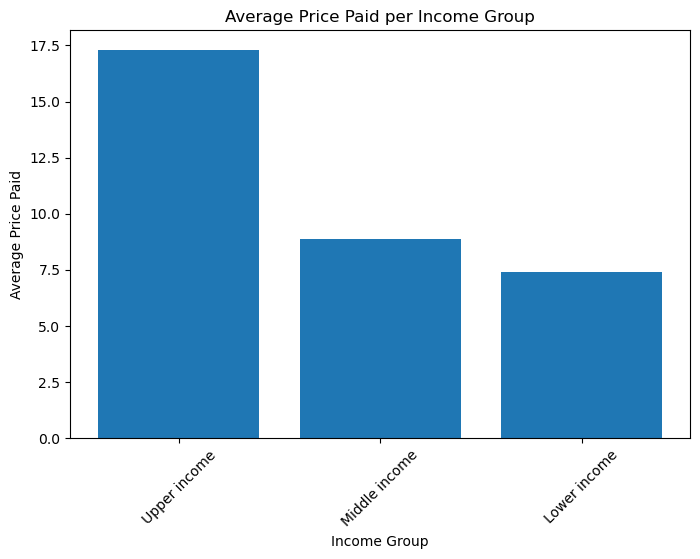

In [85]:
# Your data
average_price_by_Income_flag = df_ords_prods_customers_filtered.groupby('Income_flag')['Avg_price_paid'].mean()

# Sort the data in descending order
average_price_by_Income_flag = average_price_by_Income_flag.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.bar(average_price_by_Income_flag.index, average_price_by_Income_flag)
plt.xlabel('Income Group')
plt.ylabel('Average Price Paid')
plt.title('Average Price Paid per Income Group')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Specify the path and filename
path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'Avg_price_paid_per_Income.png'

# Increase the bottom margin to fit the labels
plt.subplots_adjust(bottom=0.2)

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Avg_price_paid_per_Income.png'))

# Show the plot
plt.show()


In [86]:
# Check Income flag and Spending flag
df_income_grouped_by_spending = df_ords_prods_customers_filtered.groupby(['Income_flag','Spending_flag'])['Spending_flag'].count()

In [87]:
# Create a new DataFrame to store the results
df_income_results = pd.DataFrame(columns=['Low Spenders', 'High Spenders'])

In [88]:
df_income_grouped_by_spending

Income_flag    Spending_flag
Lower income   High spender        31621
               Low spender       5484773
Middle income  High spender       135223
               Low spender      10894843
Upper income   High spender       266412
               Low spender       5245514
Name: Spending_flag, dtype: int64

In [89]:
# Check Income and Spending flag
df_Income_flag_grouped_by_spending = df_ords_prods_customers_filtered.groupby(['Income_flag','Spending_flag'])['Spending_flag'].count()

# Create a new DataFrame to store the results
df_Income_flag_results = pd.DataFrame(columns=['Low Spenders', 'High Spenders'])

# Calculate percentages within each income group
df_Income_flag_results = df_Income_flag_grouped_by_spending.unstack().div(df_Income_flag_grouped_by_spending.unstack().sum(axis=1), axis=0).fillna(0)

# Rename the columns
df_Income_flag_results.columns = ['High Spenders', 'Low Spenders']

df_Income_flag_results *= 100

# Sort the DataFrame by the first column in descending order
df_Income_flag_results = df_Income_flag_results.sort_values(by='High Spenders', ascending=False)

df_Income_flag_results


,High Spenders,Low Spenders
Income_flag,,
Upper income,4.833374,95.166626
Middle income,1.225949,98.774051
Lower income,0.573219,99.426781


In [90]:
# Finding average total paid by customer by Income Group
# Calculate the total amount paid for each order (price x order_number) using .loc
df_ords_prods_customers_filtered['total_amount_paid'] = df_ords_prods_customers_filtered['prices'] * df_ords_prods_customers_filtered['order_number']

# Group the DataFrame by 'Income_flag' and 'user_id,' and calculate the sum of 'total_amount_paid'
average_total_amount_by_Income_flag = df_ords_prods_customers_filtered.groupby(['Income_flag', 'user_id'])['total_amount_paid'].sum()

# Group by Income and calculate the mean of the sums for each user
average_total_amount_by_Income_flag = average_total_amount_by_Income_flag.groupby('Income_flag').mean()

average_total_amount_by_Income_flag

/var/folders/v0/xrbnqqfs3715z2hj7f5pvkf80000gn/T/ipykernel_2861/433938197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_customers_filtered['total_amount_paid'] = df_ords_prods_customers_filtered['prices'] * df_ords_prods_customers_filtered['order_number']


Income_flag
Lower income     15082.560282
Middle income    21531.297634
Upper income     21217.006324
Name: total_amount_paid, dtype: float64

#### Creating 'Profile' column with profiles

In [91]:
# Creating Single_Upperincome_Nochildren_Younger profile
df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['family_status'] == 'single') 
                                     & (df_ords_prods_customers_filtered['Income_flag'] == 'Upper income')
                                     & (df_ords_prods_customers_filtered['Number_dependants'] == 0)
                                     & (df_ords_prods_customers_filtered['Age_flag'] == 'Younger'),
                                        'Profile'] = 'Single_Upperincome_Nochildren_Younger'

/var/folders/v0/xrbnqqfs3715z2hj7f5pvkf80000gn/T/ipykernel_2861/3207490109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['family_status'] == 'single')


In [92]:
# Creating Married_Upperincome_Lfamily_MiddleAge profile
df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['family_status'] == 'married') 
                                     & (df_ords_prods_customers_filtered['Income_flag'] == 'Upper income') 
                                     & (df_ords_prods_customers_filtered['Family_size_flag'] == 'Large family') 
                                     & (df_ords_prods_customers_filtered['Age_flag'] == 'Middle Age'), 'Profile'] = 'Married_Upperincome_Lfamily_MiddleAge'

In [93]:
# Creating Married_Lowerincome_Lfamily_Younger profile
df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['family_status'] == 'married') 
                                     & (df_ords_prods_customers_filtered['Income_flag'] == 'Lower income') 
                                     & (df_ords_prods_customers_filtered['Family_size_flag'] == 'Large family') 
                                     & (df_ords_prods_customers_filtered['Age_flag'] == 'Younger'), 'Profile'] = 'Married_Lowerincome_Lfamily_Younger'

In [94]:
# Creating DivWid_Lowerincome_Nochildren_Older profile
df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['family_status'] == 'divorced/widowed') 
                                     & (df_ords_prods_customers_filtered['Income_flag'] == 'Lower income') 
                                     & (df_ords_prods_customers_filtered['Number_dependants'] == 0) 
                                     & (df_ords_prods_customers_filtered['Age_flag'] == 'Older'), 'Profile'] = 'DivWid_Lowerincome_Nochildren_Older'

In [95]:
# Creating Married_Middleincome_Sfamily_Younger profile
df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['family_status'] == 'married') 
                                     & (df_ords_prods_customers_filtered['Income_flag'] == 'Middle income') 
                                     & (df_ords_prods_customers_filtered['Family_size_flag'] == 'Small family') 
                                     & (df_ords_prods_customers_filtered['Age_flag'] == 'Younger'), 'Profile'] = 'Married_Middleincome_Sfamily_Younger'

In [96]:
# Creating Married_Upperincome_Sfamily_Older profile
df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['family_status'] == 'married') 
                                     & (df_ords_prods_customers_filtered['Income_flag'] == 'Upper income') 
                                     & (df_ords_prods_customers_filtered['Family_size_flag'] == 'Small family') 
                                     & (df_ords_prods_customers_filtered['Age_flag'] == 'Older'), 'Profile'] = 'Married_Upperincome_Sfamily_Older'

In [97]:
# Creating Younger_LivingwParents profile
df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['family_status'] == 'living with parents and siblings')
                                     & (df_ords_prods_customers_filtered['Income_flag'] == 'Lower income')
                                     & (df_ords_prods_customers_filtered['Age_flag'] == 'Younger'), 'Profile'] = 'Younger_LivingwParents'

In [98]:
# Creating Single_MiddleAged_HighSpender profile
df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['family_status'] == 'single') 
                                     & (df_ords_prods_customers_filtered['Spending_flag'] == 'High spender') 
                                     & (df_ords_prods_customers_filtered['Number_dependants'] == 0) 
                                     & (df_ords_prods_customers_filtered['Age_flag'] == 'Middle Age'), 'Profile'] = 'Single_MiddleAged_HighSpender'

In [99]:
# Creating Single_Lowspender_Lowincome profile
df_ords_prods_customers_filtered.loc[(df_ords_prods_customers_filtered['family_status'] == 'single')
                                    & (df_ords_prods_customers_filtered['Income_flag'] == 'Lower income')
                                    & (df_ords_prods_customers_filtered['Spending_flag'] == 'Low spender'), 'Profile'] = 'Single_Lowspender_Lowincome'

In [100]:
# Count of profiles with NaNs
df_ords_prods_customers_filtered['Profile'].value_counts(dropna = False)

Profile
NaN                                      15760433
Married_Middleincome_Sfamily_Younger      1603290
Married_Upperincome_Sfamily_Older         1386644
Single_Lowspender_Lowincome               1145548
Married_Lowerincome_Lfamily_Younger        736908
Married_Upperincome_Lfamily_MiddleAge      674319
Younger_LivingwParents                     478752
DivWid_Lowerincome_Nochildren_Older        219866
Single_MiddleAged_HighSpender               35817
Single_Upperincome_Nochildren_Younger       16809
Name: count, dtype: int64

In [101]:
# Count of profiles with NaNs
profile_counts = df_ords_prods_customers_filtered['Profile'].value_counts(dropna=False)

# Calculate the percentage of the total as decimals
percentage_of_total_decimal = profile_counts / profile_counts.sum()

# Display the percentage_of_total as decimals
print(percentage_of_total_decimal)

Profile
NaN                                      0.714487
Married_Middleincome_Sfamily_Younger     0.072684
Married_Upperincome_Sfamily_Older        0.062862
Single_Lowspender_Lowincome              0.051933
Married_Lowerincome_Lfamily_Younger      0.033407
Married_Upperincome_Lfamily_MiddleAge    0.030570
Younger_LivingwParents                   0.021704
DivWid_Lowerincome_Nochildren_Older      0.009967
Single_MiddleAged_HighSpender            0.001624
Single_Upperincome_Nochildren_Younger    0.000762
Name: count, dtype: float64


In [102]:
# Count of profiles without NaNs
df_ords_prods_customers_filtered['Profile'].value_counts(dropna = True)

Profile
Married_Middleincome_Sfamily_Younger     1603290
Married_Upperincome_Sfamily_Older        1386644
Single_Lowspender_Lowincome              1145548
Married_Lowerincome_Lfamily_Younger       736908
Married_Upperincome_Lfamily_MiddleAge     674319
Younger_LivingwParents                    478752
DivWid_Lowerincome_Nochildren_Older       219866
Single_MiddleAged_HighSpender              35817
Single_Upperincome_Nochildren_Younger      16809
Name: count, dtype: int64

In [103]:
# Count of profiles with NaNs
profile_counts = df_ords_prods_customers_filtered['Profile'].value_counts(dropna=True)

# Calculate the percentage of the total as decimals
percentage_of_total_decimal = profile_counts / profile_counts.sum()

# Display the percentage_of_total as decimals
print(percentage_of_total_decimal)

Profile
Married_Middleincome_Sfamily_Younger     0.254573
Married_Upperincome_Sfamily_Older        0.220174
Single_Lowspender_Lowincome              0.181892
Married_Lowerincome_Lfamily_Younger      0.117008
Married_Upperincome_Lfamily_MiddleAge    0.107070
Younger_LivingwParents                   0.076017
DivWid_Lowerincome_Nochildren_Older      0.034911
Single_MiddleAged_HighSpender            0.005687
Single_Upperincome_Nochildren_Younger    0.002669
Name: count, dtype: float64


In [104]:
# Creating df for profiles
df_Profiles_dropna = df_ords_prods_customers_filtered.dropna(subset=['Profile'])

In [105]:
df_Profiles_dropna.shape

(6297953, 40)

## Part 1, # 6: Create an appropriate visualization to show the distribution of profiles.

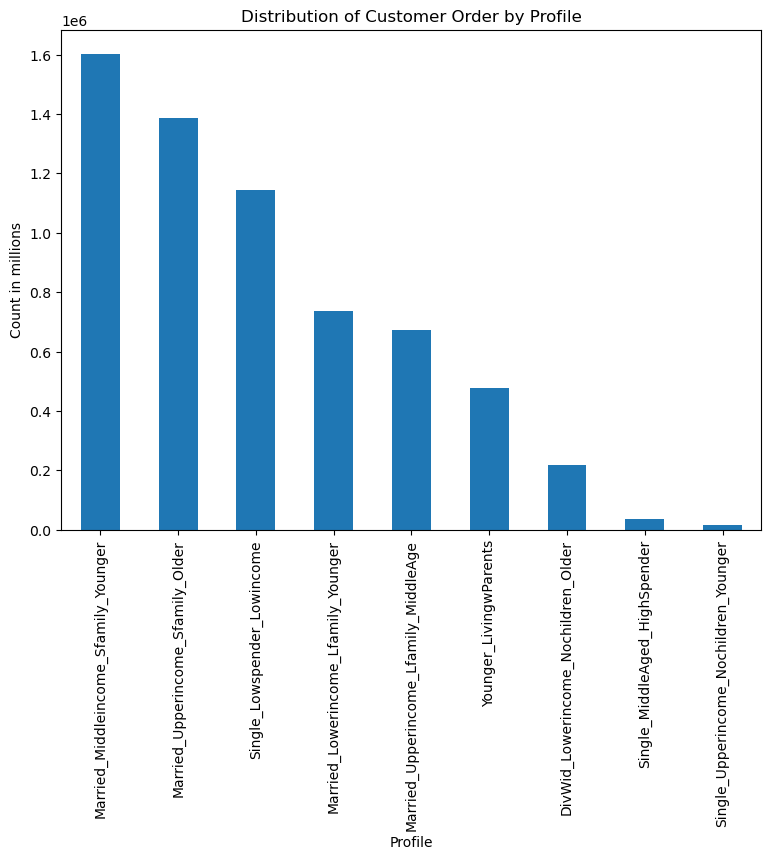

In [106]:
# Creating bar plot for profiles
plt.figure(figsize=(10, 10))
ax = df_Profiles_dropna['Profile'].value_counts().plot.bar()

# Set the title, x-axis label, and y-axis label
ax.set_title("Distribution of Customer Order by Profile")
ax.set_xlabel("Profile")
ax.set_ylabel("Count in millions")

path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'Distribution_of_order_by_profile.png'

# Adjust the margins to create more space for y-axis labels
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.4)

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Distribution_of_order_by_profile.png'))

# Show the plot
plt.show()

## Part 1, # 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [107]:
# Group the DataFrame by Profile and calculate the min, max, and mean of the Avg_days_since_order column
df_grouped = df_ords_prods_customers_filtered.groupby('Profile')['Avg_days_since_order'].agg(['min', 'max', 'mean'])

In [108]:
# Print the results
print(df_grouped)

                                            min        max       mean
Profile                                                              
DivWid_Lowerincome_Nochildren_Older    0.000000  30.000000  11.237108
Married_Lowerincome_Lfamily_Younger    0.608696  30.000000  10.865150
Married_Middleincome_Sfamily_Younger   0.833333  30.000000  10.874106
Married_Upperincome_Lfamily_MiddleAge  1.603448  30.000000  10.905217
Married_Upperincome_Sfamily_Older      0.263158  30.000000  10.759972
Single_Lowspender_Lowincome            0.000000  30.000000  11.028580
Single_MiddleAged_HighSpender          0.670732  30.000000  10.638905
Single_Upperincome_Nochildren_Younger  3.222222  28.577586  10.189142
Younger_LivingwParents                 0.947368  30.000000  11.000352


In [109]:
# Trying a different way: Finding the mean for avg_price_paid by profile
df_profiles_avgpricepaid = df_ords_prods_customers_filtered.groupby('Profile').Avg_price_paid.mean()

In [110]:
df_sorted_profiles_avgpricepaid = df_profiles_avgpricepaid.sort_values(ascending=False)

In [111]:
print(df_sorted_profiles_avgpricepaid)

Profile
Single_Upperincome_Nochildren_Younger    199.144966
Single_MiddleAged_HighSpender            120.508765
Married_Upperincome_Lfamily_MiddleAge     15.169152
Married_Upperincome_Sfamily_Older         14.280519
Married_Middleincome_Sfamily_Younger       9.403566
Married_Lowerincome_Lfamily_Younger        7.725624
Younger_LivingwParents                     7.687402
Single_Lowspender_Lowincome                7.517446
DivWid_Lowerincome_Nochildren_Older        6.855133
Name: Avg_price_paid, dtype: float64


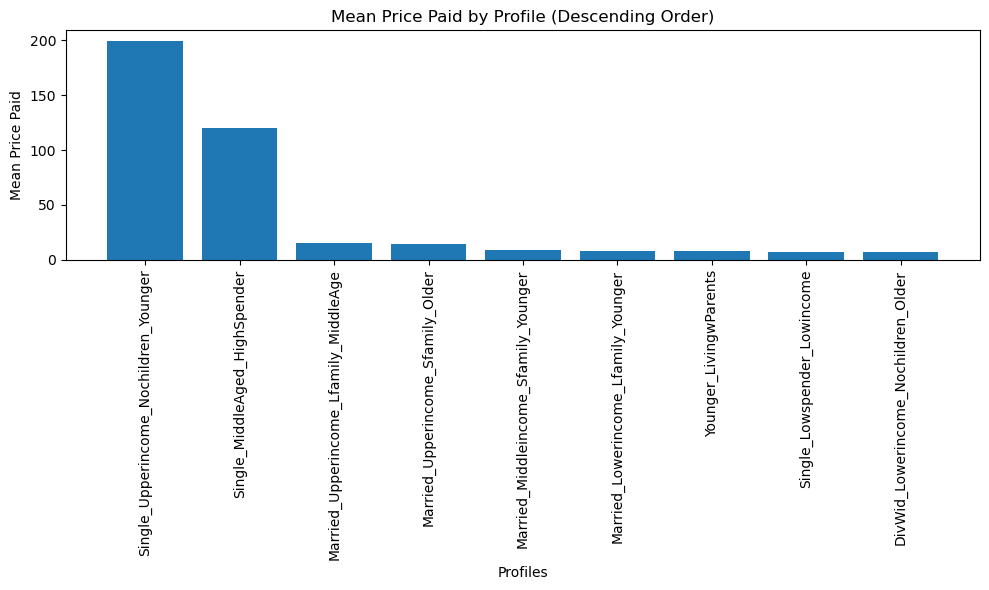

In [112]:
# Create a bar graph for mean price paid per profile
plt.figure(figsize=(10, 6))
plt.bar(df_sorted_profiles_avgpricepaid.index, df_sorted_profiles_avgpricepaid.values)

# Label the axes and title
plt.xlabel('Profiles')
plt.ylabel('Mean Price Paid')
plt.title('Mean Price Paid by Profile (Descending Order)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'Mean_price_paid_by_profile.png'

# Adjust the margins to create more space for y-axis labels
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.6)

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Mean_price_paid_by_profile.png'))

# Show the plot
plt.tight_layout()
plt.show()

In [113]:
# Max
df_profiles_avgpricepaid = df_ords_prods_customers_filtered.groupby('Profile').Avg_price_paid.max()

In [114]:
df_sorted_profiles_avgpricepaid = df_profiles_avgpricepaid.sort_values(ascending=False)

In [115]:
print(df_sorted_profiles_avgpricepaid)

Profile
Single_MiddleAged_HighSpender            4262.071429
Single_Upperincome_Nochildren_Younger    3391.568182
Married_Upperincome_Sfamily_Older        2985.329714
Married_Upperincome_Lfamily_MiddleAge    1870.331250
Married_Middleincome_Sfamily_Younger     1646.929000
Married_Lowerincome_Lfamily_Younger        25.565249
Younger_LivingwParents                     16.289474
DivWid_Lowerincome_Nochildren_Older        14.100000
Single_Lowspender_Lowincome                 9.996491
Name: Avg_price_paid, dtype: float64


In [116]:
# Min
df_profiles_avgpricepaid = df_ords_prods_customers_filtered.groupby('Profile').Avg_price_paid.min()

In [117]:
df_sorted_profiles_avgpricepaid = df_profiles_avgpricepaid.sort_values(ascending=False)

In [118]:
print(df_sorted_profiles_avgpricepaid)

Profile
Single_MiddleAged_HighSpender            10.000000
Single_Upperincome_Nochildren_Younger     5.594444
Married_Upperincome_Lfamily_MiddleAge     2.750000
Married_Upperincome_Sfamily_Older         2.700000
Married_Middleincome_Sfamily_Younger      2.354545
Younger_LivingwParents                    2.000000
Married_Lowerincome_Lfamily_Younger       1.746154
DivWid_Lowerincome_Nochildren_Older       1.000000
Single_Lowspender_Lowincome               1.000000
Name: Avg_price_paid, dtype: float64


## Part 1, # 7: Compare your customer profiles with regions and departments

#### Analysis of Married_Middleincome_Sfamily_Younger profile (Young Family)

In [119]:
# Creating Married_Middleincome_Sfamily_Younger dataframe
df_Married_Middleincome_Sfamily_Younger = df_ords_prods_customers_filtered[df_ords_prods_customers_filtered['Profile']=='Married_Middleincome_Sfamily_Younger']

In [120]:
# Finding regional numbers for Married_Middleincome_Sfamily_Younger
df_Married_Middleincome_Sfamily_Younger['Region'].value_counts(dropna = False)

Region
Mountain West    253902
Mid-Atlantic     221779
Plains           218330
South Central    198592
Southeast        192338
New England      188848
North Central    172711
West Coast       156790
Name: count, dtype: int64

In [121]:
# Finding regional percentages for Married_Middleincome_Sfamily_Younger
total_rows = df_Married_Middleincome_Sfamily_Younger.shape[0]

In [122]:
percentages = df_Married_Middleincome_Sfamily_Younger['Region'].value_counts(dropna = False) / total_rows * 100

In [123]:
print(percentages)

Region
Mountain West    15.836312
Mid-Atlantic     13.832744
Plains           13.617624
South Central    12.386530
Southeast        11.996457
New England      11.778780
North Central    10.772287
West Coast        9.779266
Name: count, dtype: float64


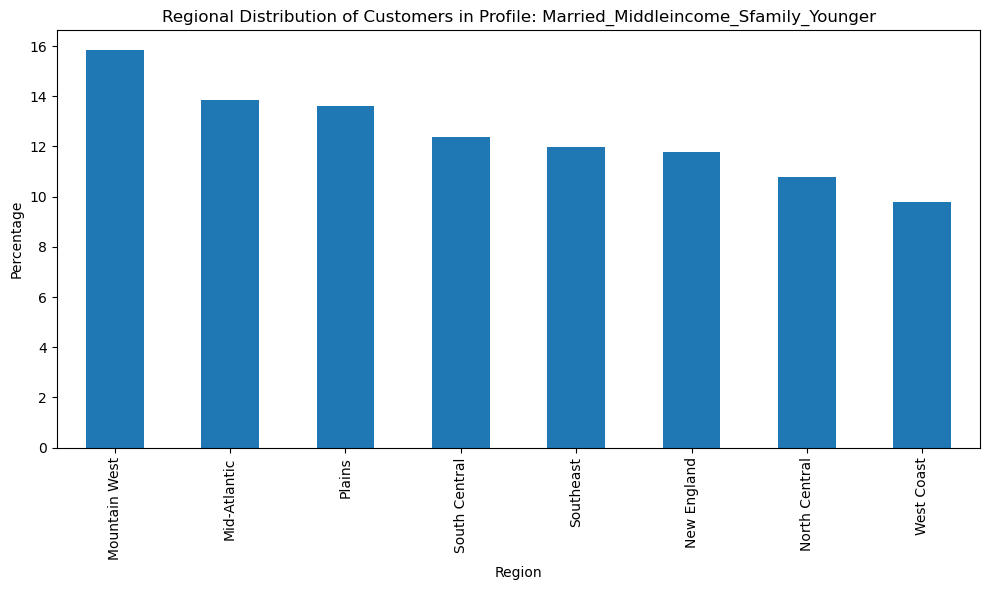

In [124]:
# Create a bar graph for regional distribution of customers in Married_Middleincome_Sfamily_Younger
plt.figure(figsize=(10, 6)) 
percentages.plot(kind='bar')

# Label the axes and title
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Regional Distribution of Customers in Profile: Married_Middleincome_Sfamily_Younger')

# Adjust the margins to create more space for y-axis labels
plt.subplots_adjust(left=0.3, right=0.8, top=0.9, bottom=0.3)

path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'Regional_dist_Married_Middleincome_Sfamily_Younger.png'

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regional_dist_Married_Middleincome_Sfamily_Younger'))

# Show the plot
plt.tight_layout()
plt.show()

In [125]:
# Finding department_id numbers for Married_Middleincome_Sfamily_Younger
df_Married_Middleincome_Sfamily_Younger['department_id'].value_counts(dropna = False)

department_id
4     627677
16    303540
7     103898
19     93272
1      89339
13     79133
20     48272
3      48013
15     47987
12     38373
9      36909
14     25951
17     24397
18     14211
6       8598
11      5956
5       3544
10      1659
21      1440
8        836
2        285
Name: count, dtype: int64

In [126]:
# Finding department_id percentages for Married_Middleincome_Sfamily_Younger
total_rows = df_Married_Middleincome_Sfamily_Younger.shape[0]

In [127]:
percentages = df_Married_Middleincome_Sfamily_Younger['department_id'].value_counts(dropna = False) / total_rows * 100

In [128]:
print(percentages)

department_id
4     39.149312
16    18.932320
7      6.480300
19     5.817538
1      5.572230
13     4.935664
20     3.010809
3      2.994655
15     2.993033
12     2.393391
9      2.302079
14     1.618609
17     1.521684
18     0.886365
6      0.536272
11     0.371486
5      0.221045
10     0.103475
21     0.089815
8      0.052143
2      0.017776
Name: count, dtype: float64


In [129]:
# Finding loyalty flag percentages for Married_Middleincome_Sfamily_Younger
percentages = df_Married_Middleincome_Sfamily_Younger['loyalty_flag'].value_counts(dropna = False) / total_rows * 100

In [130]:
print(percentages)

loyalty_flag
Regular customer    51.839779
Loyal customer      33.912081
New customer        14.248140
Name: count, dtype: float64


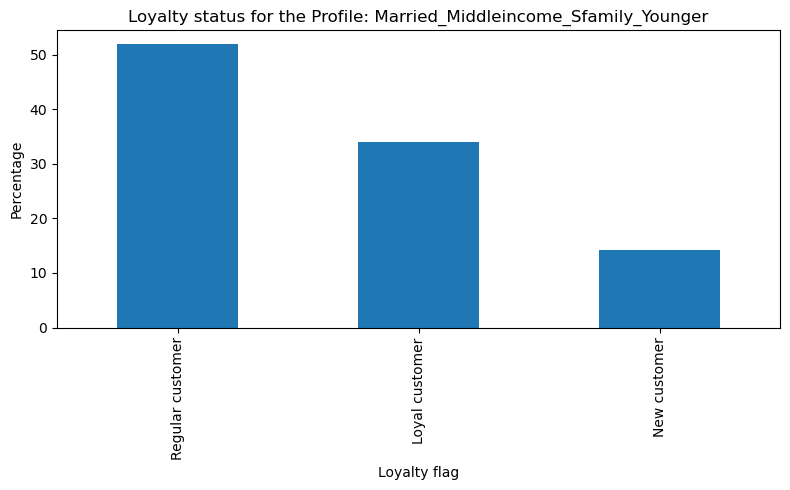

In [131]:
# Create a bar graph for loyalty status of customers in Married_Middleincome_Sfamily_Younger
plt.figure(figsize=(8, 5)) 
percentages.plot(kind='bar')

# Label the axes and title
plt.xlabel('Loyalty flag')
plt.ylabel('Percentage')
plt.title('Loyalty status for the Profile: Married_Middleincome_Sfamily_Younger')

# Show the plot
plt.tight_layout()
plt.show()

In [132]:
# Finding price range percentages for Married_Middleincome_Sfamily_Younger
percentages = df_Married_Middleincome_Sfamily_Younger['price_range_loc'].value_counts(dropna = False) / total_rows * 100

In [133]:
print(percentages)

price_range_loc
Mid-range product     69.855609
Low-range product     28.749634
High-range product     1.394757
Name: count, dtype: float64


#### Analysis of Married_Upperincome_Sfamily_Older profile (Affluent Small Family)

In [134]:
# Creating Married_Upperincome_Sfamily_Older dataframe
df_Married_Upperincome_Sfamily_Older = df_ords_prods_customers_filtered[df_ords_prods_customers_filtered['Profile']=='Married_Upperincome_Sfamily_Older']

In [135]:
# Finding regional numbers for Married_Upperincome_Sfamily_Older
df_Married_Upperincome_Sfamily_Older['Region'].value_counts(dropna = False)

Region
Mountain West    216969
Mid-Atlantic     184052
Plains           178169
Southeast        169272
North Central    168769
New England      167714
South Central    166703
West Coast       134996
Name: count, dtype: int64

In [136]:
# Finding regional percentages for Married_Upperincome_Sfamily_Older
total_rows = df_Married_Upperincome_Sfamily_Older.shape[0]

In [137]:
percentages = df_Married_Upperincome_Sfamily_Older['Region'].value_counts(dropna = False) / total_rows * 100

In [138]:
print(percentages)

Region
Mountain West    15.647059
Mid-Atlantic     13.273198
Plains           12.848936
Southeast        12.207315
North Central    12.171040
New England      12.094957
South Central    12.022047
West Coast        9.735448
Name: count, dtype: float64


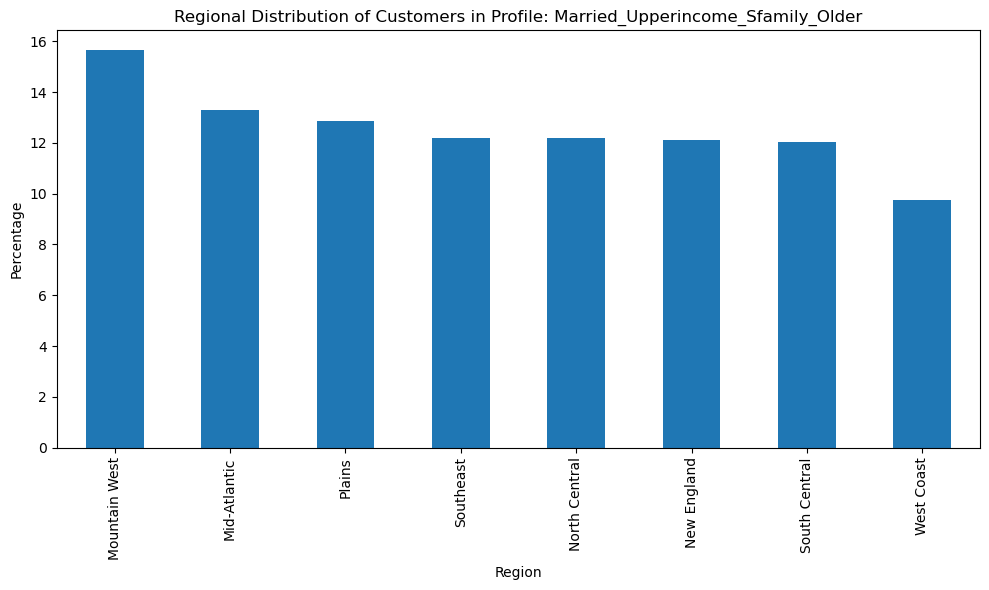

In [139]:
# Create a bar graph for regional distribution of customers in Married_Upperincome_Sfamily_Older
plt.figure(figsize=(10, 6)) 
percentages.plot(kind='bar')

# Label the axes and title
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Regional Distribution of Customers in Profile: Married_Upperincome_Sfamily_Older')

# Adjust the margins to create more space for y-axis labels
plt.subplots_adjust(left=0.3, right=0.8, top=0.9, bottom=0.3)

path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'Regional_dist_Married_Upperincome_Sfamily_Older.png'

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regional_dist_Married_Upperincome_Sfamily_Older'))

# Show the plot
plt.tight_layout()
plt.show()

In [140]:
# Finding department_id numbers for Married_Upperincome_Sfamily_Older
df_Married_Upperincome_Sfamily_Older['department_id'].value_counts(dropna = False)

department_id
4     535107
16    259490
7      95646
19     79860
1      77463
13     68396
3      44215
20     42987
15     41771
12     33754
9      32261
14     22873
17     21009
18     12177
6       7323
11      5277
5       3492
10      1369
21      1227
8        627
2        320
Name: count, dtype: int64

In [141]:
# Finding department_id percentages for Married_Upperincome_Sfamily_Older
total_rows = df_Married_Upperincome_Sfamily_Older.shape[0]

In [142]:
percentages = df_Married_Upperincome_Sfamily_Older['department_id'].value_counts(dropna = False) / total_rows * 100

In [143]:
print(percentages)

department_id
4     38.590078
16    18.713527
7      6.897661
19     5.759229
1      5.586365
13     4.932484
3      3.188634
20     3.100075
15     3.012381
12     2.434222
9      2.326552
14     1.649522
17     1.515097
18     0.878163
6      0.528110
11     0.380559
5      0.251831
10     0.098728
21     0.088487
8      0.045217
2      0.023077
Name: count, dtype: float64


In [144]:
# Finding loyalty flag percentages for Married_Upperincome_Sfamily_Older
percentages = df_Married_Upperincome_Sfamily_Older['loyalty_flag'].value_counts(dropna = False) / total_rows * 100

In [145]:
print(percentages)

loyalty_flag
Regular customer    50.659578
Loyal customer      34.856603
New customer        14.483818
Name: count, dtype: float64


In [146]:
# Finding price range percentages for Married_Upperincome_Sfamily_Older
percentages = df_Married_Upperincome_Sfamily_Older['price_range_loc'].value_counts(dropna = False) / total_rows * 100

In [147]:
print(percentages)

price_range_loc
Mid-range product     69.879508
Low-range product     28.699940
High-range product     1.420552
Name: count, dtype: float64


#### Analysis of Single_Lowspender_Lowincome profile (Constrained Single)

In [148]:
# Creating Single_Lowspender_Lowincome dataframe
df_Single_Lowspender_Lowincome = df_ords_prods_customers_filtered[df_ords_prods_customers_filtered['Profile']=='Single_Lowspender_Lowincome']

In [149]:
# Finding regional numbers for Single_Lowspender_Lowincome
df_Single_Lowspender_Lowincome['Region'].value_counts(dropna = False)

Region
Mountain West    184199
Mid-Atlantic     155436
Plains           146236
South Central    139437
Southeast        137629
North Central    135660
New England      129007
West Coast       117944
Name: count, dtype: int64

In [150]:
# Finding regional percentages for Single_Lowspender_Lowincome
total_rows = df_Single_Lowspender_Lowincome.shape[0]

In [151]:
percentages = df_Single_Lowspender_Lowincome['Region'].value_counts(dropna = False) / total_rows * 100

In [152]:
print(percentages)

Region
Mountain West    16.079553
Mid-Atlantic     13.568702
Plains           12.765593
South Central    12.172078
Southeast        12.014250
North Central    11.842367
New England      11.261597
West Coast       10.295858
Name: count, dtype: float64


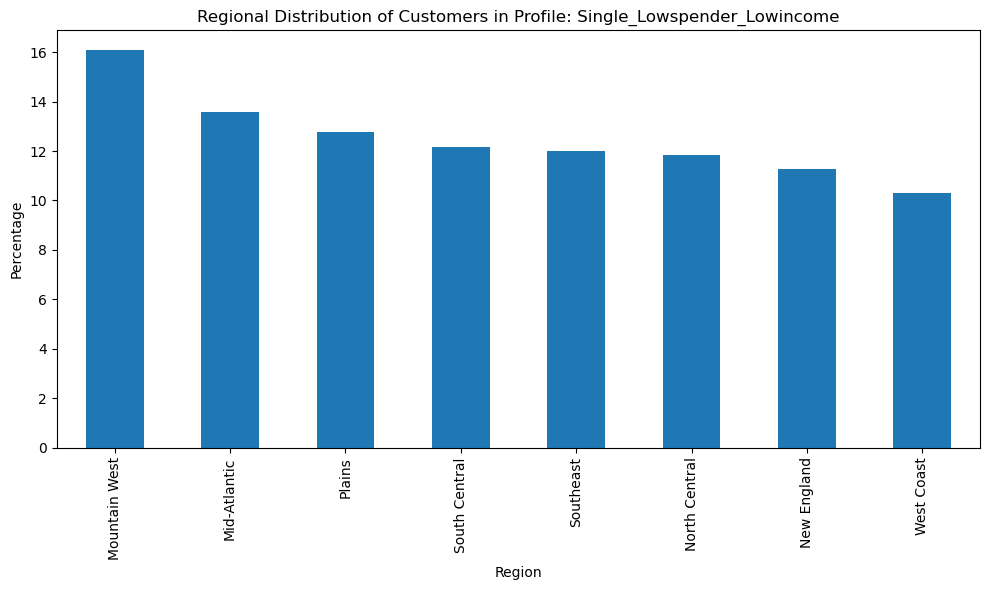

In [153]:
# Create a bar graph for regional distribution of customers in Single_Lowspender_Lowincome
plt.figure(figsize=(10, 6)) 
percentages.plot(kind='bar')

# Label the axes and title
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Regional Distribution of Customers in Profile: Single_Lowspender_Lowincome')

# Adjust the margins to create more space for y-axis labels
plt.subplots_adjust(left=0.3, right=0.8, top=0.9, bottom=0.3)

path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'Regional_dist_Single_Lowspender_Lowincome.png'

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regional_dist_Single_Lowspender_Lowincome'))

# Show the plot
plt.tight_layout()
plt.show()

In [154]:
# Finding department_id numbers for Single_Lowspender_Lowincome
df_Single_Lowspender_Lowincome['department_id'].value_counts(dropna = False)

department_id
4     424008
16    204930
19    101566
7      93741
1      60637
13     54413
20     35759
3      34246
15     30370
9      23532
14     20213
12     20115
17     17628
18      8561
6       6102
11      4294
5       2561
10      1279
21       923
8        436
2        234
Name: count, dtype: int64

In [155]:
# Finding department_id percentages for Single_Lowspender_Lowincome
total_rows = df_Single_Lowspender_Lowincome.shape[0]

In [156]:
percentages = df_Single_Lowspender_Lowincome['department_id'].value_counts(dropna = False) / total_rows * 100

In [157]:
print(percentages)

department_id
4     37.013552
16    17.889255
19     8.866150
7      8.183070
1      5.293274
13     4.749954
20     3.121563
3      2.989486
15     2.651133
9      2.054213
14     1.764483
12     1.755928
17     1.538827
18     0.747328
6      0.532671
11     0.374842
5      0.223561
10     0.111650
21     0.080573
8      0.038060
2      0.020427
Name: count, dtype: float64


In [158]:
# Finding loyalty flag percentages for Single_Lowspender_Lowincome
percentages = df_Single_Lowspender_Lowincome['loyalty_flag'].value_counts(dropna = False) / total_rows * 100

In [159]:
print(percentages)

loyalty_flag
Regular customer    49.696303
Loyal customer      33.999797
New customer        16.303900
Name: count, dtype: float64


In [160]:
# Finding price range percentages for Single_Lowspender_Lowincome
percentages = df_Single_Lowspender_Lowincome['price_range_loc'].value_counts(dropna = False) / total_rows * 100

In [161]:
print(percentages)

price_range_loc
Mid-range product     65.371944
Low-range product     33.647739
High-range product     0.980317
Name: count, dtype: float64


#### Analysis of Married_Lowerincome_Lfamily_Younger (Constrained Large Family)

In [162]:
# Creating Married_Lowerincome_Lfamily_Younger dataframe
df_Married_Lowerincome_Lfamily_Younger = df_ords_prods_customers_filtered[df_ords_prods_customers_filtered['Profile']=='Married_Lowerincome_Lfamily_Younger']

In [163]:
# Finding regional numbers for Married_Lowerincome_Lfamily_Younger
df_Married_Lowerincome_Lfamily_Younger['Region'].value_counts(dropna = False)

Region
Mountain West    127588
Southeast         99531
Plains            99162
Mid-Atlantic      96902
New England       84196
South Central     83952
North Central     79248
West Coast        66329
Name: count, dtype: int64

In [164]:
# Finding regional percentages for Married_Lowerincome_Lfamily_Younger
total_rows = df_Married_Lowerincome_Lfamily_Younger.shape[0]

In [165]:
percentages = df_Married_Lowerincome_Lfamily_Younger['Region'].value_counts(dropna = False) / total_rows * 100

In [166]:
print(percentages)

Region
Mountain West    17.313966
Southeast        13.506571
Plains           13.456497
Mid-Atlantic     13.149810
New England      11.425578
South Central    11.392467
North Central    10.754124
West Coast        9.000988
Name: count, dtype: float64


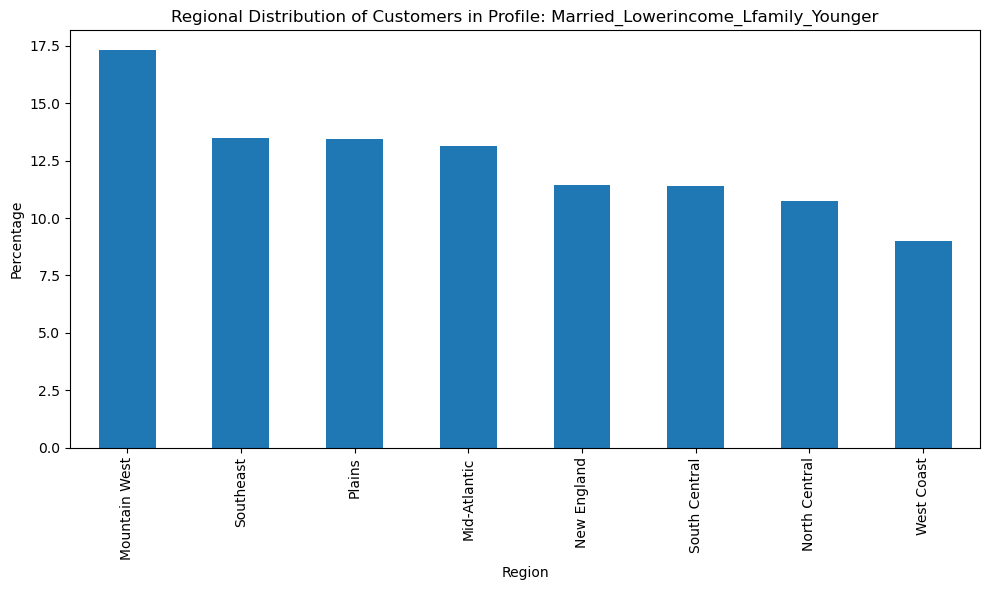

In [167]:
# Create a bar graph for regional distribution of customers in Married_Lowerincome_Lfamily_Younger
plt.figure(figsize=(10, 6)) 
percentages.plot(kind='bar')

# Label the axes and title
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Regional Distribution of Customers in Profile: Married_Lowerincome_Lfamily_Younger')

# Adjust the margins to create more space for y-axis labels
plt.subplots_adjust(left=0.3, right=0.8, top=0.9, bottom=0.3)

path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'Regional_dist_Married_Lowerincome_Lfamily_Younger.png'

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regional_dist_Married_Lowerincome_Lfamily_Younger'))

# Show the plot
plt.tight_layout()
plt.show()

In [168]:
# Finding department_id numbers for Married_Lowerincome_Lfamily_Younger
df_Married_Lowerincome_Lfamily_Younger['department_id'].value_counts(dropna = False)

department_id
4     279310
16    133111
19     58948
7      55831
1      40675
13     34684
20     22318
3      21344
15     20176
9      15682
12     15352
14     12403
17     11103
18      6007
6       3687
11      2788
5       1482
10       874
21       635
8        306
2        192
Name: count, dtype: int64

In [169]:
# Finding department_id percentages for Married_Lowerincome_Lfamily_Younger
total_rows = df_Married_Lowerincome_Lfamily_Younger.shape[0]

In [170]:
percentages = df_Married_Lowerincome_Lfamily_Younger['department_id'].value_counts(dropna = False) / total_rows * 100

In [171]:
print(percentages)

department_id
4     37.902968
16    18.063449
19     7.999370
7      7.576387
1      5.519685
13     4.706693
20     3.028601
3      2.896427
15     2.737927
9      2.128081
12     2.083299
14     1.683114
17     1.506701
18     0.815163
6      0.500334
11     0.378338
5      0.201111
10     0.118604
21     0.086171
8      0.041525
2      0.026055
Name: count, dtype: float64


In [172]:
# Finding loyalty flag percentages for Married_Lowerincome_Lfamily_Younger
percentages = df_Married_Lowerincome_Lfamily_Younger['loyalty_flag'].value_counts(dropna = False) / total_rows * 100

In [173]:
print(percentages)

loyalty_flag
Regular customer    50.859673
Loyal customer      34.086209
New customer        15.054118
Name: count, dtype: float64


In [174]:
# Finding price range percentages for Married_Lowerincome_Lfamily_Younger
percentages = df_Married_Lowerincome_Lfamily_Younger['price_range_loc'].value_counts(dropna = False) / total_rows * 100

In [175]:
print(percentages)

price_range_loc
Mid-range product     67.026413
Low-range product     31.787822
High-range product     1.185765
Name: count, dtype: float64


#### Analysis of Married_Upperincome_Lfamily_MiddleAge (Affluent Large Family)

In [176]:
# Creating Married_Upperincome_Lfamily_MiddleAge
df_Married_Upperincome_Lfamily_MiddleAge = df_ords_prods_customers_filtered[df_ords_prods_customers_filtered['Profile']=='Married_Upperincome_Lfamily_MiddleAge']

In [177]:
# Finding regional numbers for Married_Upperincome_Lfamily_MiddleAge
df_Married_Upperincome_Lfamily_MiddleAge['Region'].value_counts(dropna = False)

Region
Mountain West    108285
Plains            94820
Mid-Atlantic      90648
South Central     82266
Southeast         79252
New England       75659
West Coast        71936
North Central     71453
Name: count, dtype: int64

In [178]:
# Finding regional percentages for Married_Upperincome_Lfamily_MiddleAge
total_rows = df_Married_Upperincome_Lfamily_MiddleAge.shape[0]

In [179]:
percentages = df_Married_Upperincome_Lfamily_MiddleAge['Region'].value_counts(dropna = False) / total_rows * 100

In [180]:
print(percentages)

Region
Mountain West    16.058423
Plains           14.061594
Mid-Atlantic     13.442896
South Central    12.199864
Southeast        11.752894
New England      11.220061
West Coast       10.667948
North Central    10.596320
Name: count, dtype: float64


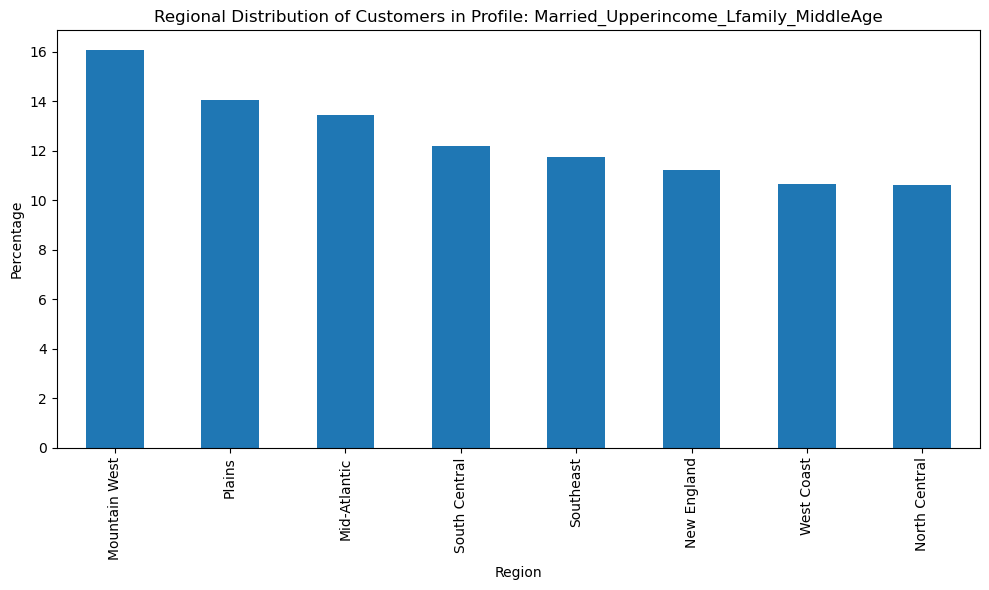

In [181]:
# Create a bar graph for regional distribution of customers in Married_Upperincome_Lfamily_MiddleAge
plt.figure(figsize=(10, 6)) 
percentages.plot(kind='bar')

# Label the axes and title
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Regional Distribution of Customers in Profile: Married_Upperincome_Lfamily_MiddleAge')

# Adjust the margins to create more space for y-axis labels
plt.subplots_adjust(left=0.3, right=0.8, top=0.9, bottom=0.3)

path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'Regional_dist_Married_Upperincome_Lfamily_MiddleAge.png'

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regional_dist_Married_Upperincome_Lfamily_MiddleAge'))

# Show the plot
plt.tight_layout()
plt.show()

In [182]:
# Finding department_id numbers for Married_Upperincome_Lfamily_MiddleAge
df_Married_Upperincome_Lfamily_MiddleAge['department_id'].value_counts(dropna = False)

department_id
4     263833
16    124611
7      44445
19     39334
1      36696
13     33574
3      20824
20     20638
15     20472
12     16856
9      15606
14     10623
17     10437
18      6352
6       3616
11      2448
5       2038
21       681
10       572
8        471
2        192
Name: count, dtype: int64

In [183]:
# Finding department_id percentages for Married_Upperincome_Lfamily_MiddleAge
total_rows = df_Married_Upperincome_Lfamily_MiddleAge.shape[0]

In [184]:
percentages = df_Married_Upperincome_Lfamily_MiddleAge['department_id'].value_counts(dropna = False) / total_rows * 100

In [185]:
print(percentages)

department_id
4     39.125844
16    18.479533
7      6.591094
19     5.833144
1      5.441935
13     4.978949
3      3.088153
20     3.060569
15     3.035952
12     2.499707
9      2.314335
14     1.575367
17     1.547784
18     0.941987
6      0.536245
11     0.363033
5      0.302231
21     0.100991
10     0.084826
8      0.069848
2      0.028473
Name: count, dtype: float64


In [186]:
# Finding loyalty flag percentages for Married_Upperincome_Lfamily_MiddleAge
percentages = df_Married_Upperincome_Lfamily_MiddleAge['loyalty_flag'].value_counts(dropna = False) / total_rows * 100

In [187]:
print(percentages)

loyalty_flag
Regular customer    52.145498
Loyal customer      33.683464
New customer        14.171038
Name: count, dtype: float64


In [188]:
# Finding price range percentages for Married_Upperincome_Lfamily_MiddleAge
percentages = df_Married_Upperincome_Lfamily_MiddleAge['price_range_loc'].value_counts(dropna = False) / total_rows * 100

In [189]:
print(percentages)

price_range_loc
Mid-range product     69.637961
Low-range product     28.928890
High-range product     1.433150
Name: count, dtype: float64


#### Analysis of Younger_LivingwParents profile (Young Dependant)

In [190]:
# Creating Younger_LivingwParents dataframe
df_Younger_LivingwParents = df_ords_prods_customers_filtered[df_ords_prods_customers_filtered['Profile']=='Younger_LivingwParents']

In [191]:
# Finding regional numbers for Younger_LivingwParents
df_Younger_LivingwParents['Region'].value_counts(dropna = False)

Region
Mountain West    80357
Plains           68265
Mid-Atlantic     61310
South Central    58479
Southeast        57510
New England      55277
North Central    53738
West Coast       43816
Name: count, dtype: int64

In [192]:
# Finding regional percentages for Younger_LivingwParents
total_rows = df_Younger_LivingwParents.shape[0]

In [193]:
percentages = df_Younger_LivingwParents['Region'].value_counts(dropna = False) / total_rows * 100

In [194]:
print(percentages)

Region
Mountain West    16.784682
Plains           14.258948
Mid-Atlantic     12.806213
South Central    12.214884
Southeast        12.012482
New England      11.546061
North Central    11.224601
West Coast        9.152129
Name: count, dtype: float64


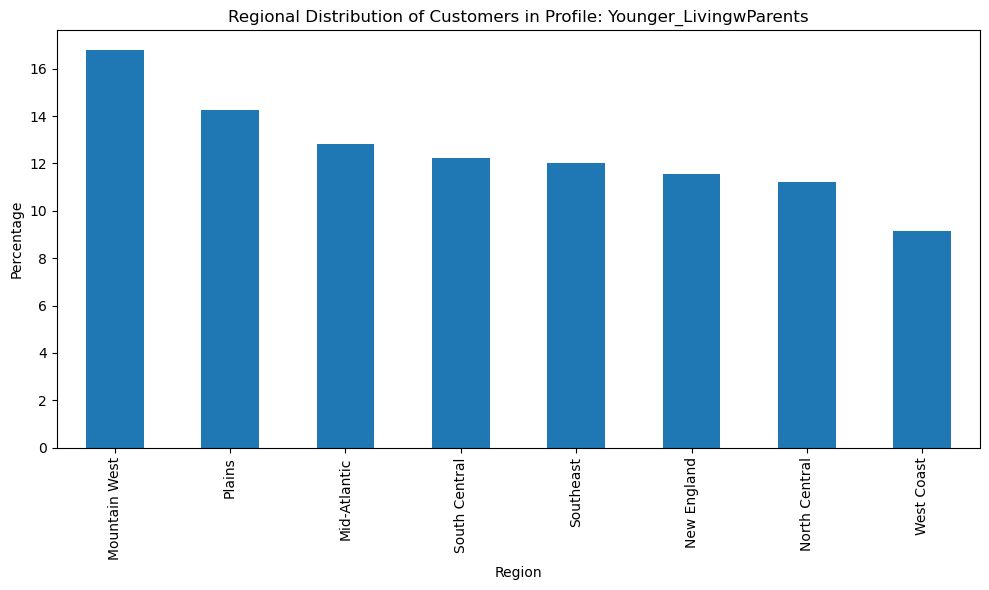

In [195]:
# Create a bar graph for regional distribution of customers in Younger_LivingwParents
plt.figure(figsize=(10, 6)) 
percentages.plot(kind='bar')

# Label the axes and title
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Regional Distribution of Customers in Profile: Younger_LivingwParents')

# Adjust the margins to create more space for y-axis labels
plt.subplots_adjust(left=0.3, right=0.8, top=0.9, bottom=0.3)

path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'Regional_dist_Married_Upperincome_Lfamily_MiddleAge.png'

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regional_dist_Younger_LivingwParents'))

# Show the plot
plt.tight_layout()
plt.show()

In [196]:
# Finding department_id numbers for Younger_LivingwParents
df_Younger_LivingwParents['department_id'].value_counts(dropna = False)

department_id
4     176223
16     87423
19     37994
7      36414
1      27302
13     23142
20     15474
3      13992
15     13655
9      10605
12      9706
14      8544
17      7285
18      3828
6       2558
11      1812
5       1348
10       536
21       470
8        331
2        110
Name: count, dtype: int64

In [197]:
# Finding department_id percentages for Younger_LivingwParents
total_rows = df_Younger_LivingwParents.shape[0]

In [198]:
percentages = df_Younger_LivingwParents['department_id'].value_counts(dropna = False) / total_rows * 100

In [199]:
print(percentages)

department_id
4     36.808828
16    18.260603
19     7.936050
7      7.606026
1      5.702744
13     4.833818
20     3.232154
3      2.922599
15     2.852207
9      2.215134
12     2.027354
14     1.784640
17     1.521665
18     0.799579
6      0.534306
11     0.378484
5      0.281565
10     0.111958
21     0.098172
8      0.069138
2      0.022976
Name: count, dtype: float64


In [200]:
# Finding loyalty flag percentages for Younger_LivingwParents
percentages = df_Younger_LivingwParents['loyalty_flag'].value_counts(dropna = False) / total_rows * 100

In [201]:
print(percentages)

loyalty_flag
Regular customer    51.686050
Loyal customer      32.848949
New customer        15.465001
Name: count, dtype: float64


In [202]:
# Finding price range percentages for Younger_LivingwParents
percentages = df_Younger_LivingwParents['price_range_loc'].value_counts(dropna = False) / total_rows * 100

In [203]:
print(percentages)

price_range_loc
Mid-range product     66.826248
Low-range product     32.013652
High-range product     1.160100
Name: count, dtype: float64


#### Analysis of DivWid Lowerincome Nochildren Older profile (Lower-Income Divorced/Widowed)

In [204]:
df_DivWid_Lowerincome_Nochildren_Older = df_ords_prods_customers_filtered[df_ords_prods_customers_filtered['Profile']=='DivWid_Lowerincome_Nochildren_Older']

In [205]:
df_DivWid_Lowerincome_Nochildren_Older['Region'].value_counts(dropna = False)

Region
Mid-Atlantic     34638
Plains           32616
Mountain West    31510
South Central    28304
New England      25516
North Central    24484
West Coast       21468
Southeast        21330
Name: count, dtype: int64

In [206]:
df_DivWid_Lowerincome_Nochildren_Older['Region'].value_counts(dropna = False)

Region
Mid-Atlantic     34638
Plains           32616
Mountain West    31510
South Central    28304
New England      25516
North Central    24484
West Coast       21468
Southeast        21330
Name: count, dtype: int64

In [207]:
total_rows = df_DivWid_Lowerincome_Nochildren_Older.shape[0]

In [208]:
percentages = df_DivWid_Lowerincome_Nochildren_Older['Region'].value_counts(dropna = False) / total_rows * 100

In [209]:
print(percentages)

Region
Mid-Atlantic     15.754141
Plains           14.834490
Mountain West    14.331456
South Central    12.873296
New England      11.605250
North Central    11.135874
West Coast        9.764129
Southeast         9.701364
Name: count, dtype: float64


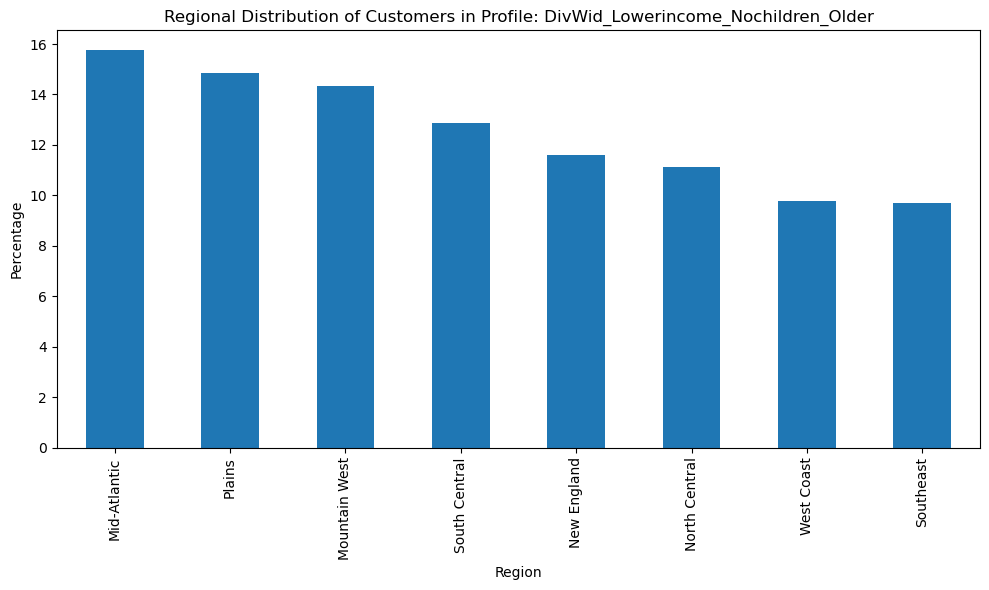

In [210]:
# Create a bar graph for regional distribution of customers in DivWid_Lowerincome_Nochildren_Older
plt.figure(figsize=(10, 6)) 
percentages.plot(kind='bar')

# Label the axes and title
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Regional Distribution of Customers in Profile: DivWid_Lowerincome_Nochildren_Older')

# Adjust the margins to create more space for y-axis labels
plt.subplots_adjust(left=0.3, right=0.8, top=0.9, bottom=0.3)

path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'Regional_dist_DivWid_Lowerincome_Nochildren_Older.png'

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regional_dist_DivWid_Lowerincome_Nochildren_Older'))

# Show the plot
plt.tight_layout()
plt.show()

In [211]:
df_DivWid_Lowerincome_Nochildren_Older['department_id'].value_counts(dropna = False)

department_id
4     72836
16    37610
19    27786
7     23588
1     11940
13     9490
20     6672
3      5970
15     4832
14     4420
17     4034
9      3989
12     2428
18     1407
11      925
6       888
5       485
10      270
21      190
8        75
2        31
Name: count, dtype: int64

In [250]:
# Finding department_id percentages for DivWid_Lowerincome_Nochildren_Older
total_rows = df_DivWid_Lowerincome_Nochildren_Older.shape[0]
percentages_as_decimals = df_DivWid_Lowerincome_Nochildren_Older['department_id'].value_counts(dropna=False) / total_rows
print(percentages_as_decimals)

department_id
4     0.331275
16    0.171059
19    0.126377
7     0.107284
1     0.054306
13    0.043163
20    0.030346
3     0.027153
15    0.021977
14    0.020103
17    0.018348
9     0.018143
12    0.011043
18    0.006399
11    0.004207
6     0.004039
5     0.002206
10    0.001228
21    0.000864
8     0.000341
2     0.000141
Name: count, dtype: float64


In [212]:
percentages = df_DivWid_Lowerincome_Nochildren_Older['loyalty_flag'].value_counts(dropna = False) / total_rows * 100

In [213]:
print(percentages)

loyalty_flag
Regular customer    49.871740
Loyal customer      31.758435
New customer        18.369825
Name: count, dtype: float64


In [214]:
percentages = df_DivWid_Lowerincome_Nochildren_Older['price_range_loc'].value_counts(dropna = False) / total_rows * 100

In [215]:
print(percentages)

price_range_loc
Mid-range product     59.410732
Low-range product     40.073499
High-range product     0.515769
Name: count, dtype: float64


#### Analysis of Single_MiddleAged_HighSpender profile (High-Spending Single)

In [265]:
# Creating Single_MiddleAged_HighSpender
df_Single_MiddleAged_HighSpender = df_ords_prods_customers_filtered[df_ords_prods_customers_filtered['Profile']=='Single_MiddleAged_HighSpender']

In [266]:
# Finding regional numbers for Single_MiddleAged_HighSpender
df_Single_MiddleAged_HighSpender['Region'].value_counts(dropna = False)

Region
Southeast        6203
Plains           5717
Mountain West    5577
New England      4673
Mid-Atlantic     3699
North Central    3507
West Coast       3393
South Central    3048
Name: count, dtype: int64

In [267]:
# Finding regional percentages for Single_MiddleAged_HighSpender
total_rows = df_Single_MiddleAged_HighSpender.shape[0]

In [268]:
percentages = df_Single_MiddleAged_HighSpender['Region'].value_counts(dropna = False) / total_rows * 100

In [269]:
print(percentages)

Region
Southeast        17.318592
Plains           15.961694
Mountain West    15.570818
New England      13.046877
Mid-Atlantic     10.327498
North Central     9.791440
West Coast        9.473155
South Central     8.509925
Name: count, dtype: float64


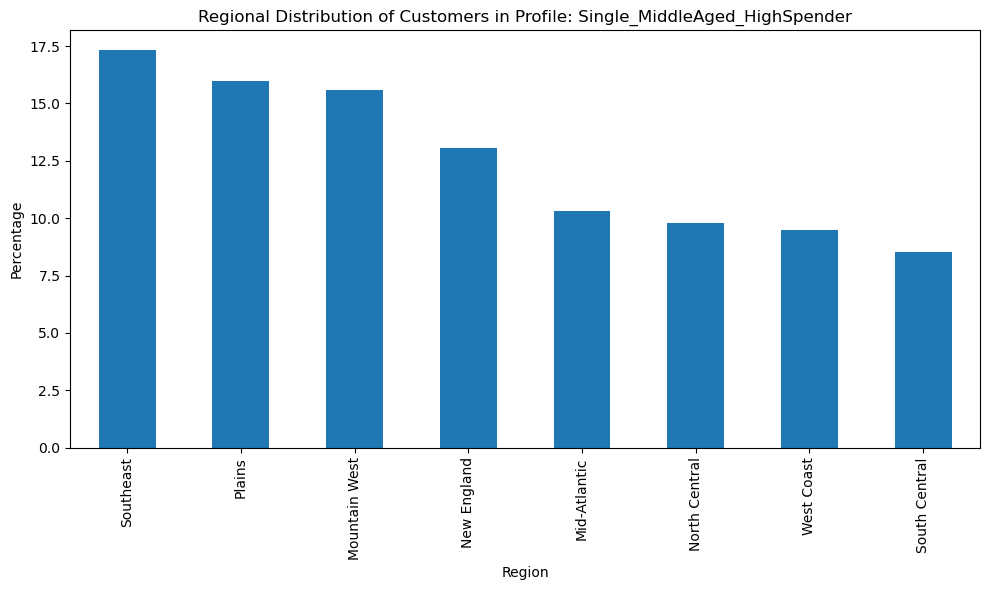

In [270]:
# Create a bar graph for regional distribution of customers in Single_MiddleAged_HighSpender
plt.figure(figsize=(10, 6)) 
percentages.plot(kind='bar')

# Label the axes and title
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Regional Distribution of Customers in Profile: Single_MiddleAged_HighSpender')

# Adjust the margins to create more space for y-axis labels
plt.subplots_adjust(left=0.3, right=0.8, top=0.9, bottom=0.3)

path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'Regional_dist_Single_MiddleAged_HighSpender.png'

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regional_dist_Single_MiddleAged_HighSpender'))

# Show the plot
plt.tight_layout()
plt.show()

In [271]:
# Finding department_id numbers for Single_MiddleAged_HighSpender
df_Single_MiddleAged_HighSpender['department_id'].value_counts(dropna = False)

department_id
4     11056
16     7969
7      3042
1      2088
19     1898
13     1856
12     1490
3      1356
20      990
17      816
15      757
9       692
14      579
5       559
6       216
18      177
11      169
8        44
2        35
21       21
10        7
Name: count, dtype: int64

In [272]:
# Finding department_id percentages for Single_MiddleAged_HighSpender
total_rows = df_Single_MiddleAged_HighSpender.shape[0]
percentages_as_decimals = df_Single_MiddleAged_HighSpender['department_id'].value_counts(dropna=False) / total_rows
print(percentages_as_decimals)

department_id
4     0.308680
16    0.222492
7     0.084932
1     0.058296
19    0.052992
13    0.051819
12    0.041600
3     0.037859
20    0.027641
17    0.022782
15    0.021135
9     0.019320
14    0.016166
5     0.015607
6     0.006031
18    0.004942
11    0.004718
8     0.001228
2     0.000977
21    0.000586
10    0.000195
Name: count, dtype: float64


In [314]:
# Finding loyalty flag percentages for Single_MiddleAged_HighSpender
total_rows = df_Single_MiddleAged_HighSpender.shape[0]
percentages_as_decimals = df_Single_MiddleAged_HighSpender['loyalty_flag'].value_counts(dropna=False) / total_rows
print(percentages_as_decimals)

loyalty_flag
Regular customer    0.488316
Loyal customer      0.353380
New customer        0.158305
Name: count, dtype: float64


In [315]:
# Finding price range percentages for Single_MiddleAged_HighSpender
percentages_as_decimals = df_Single_MiddleAged_HighSpender['price_range_loc'].value_counts(dropna = False) / total_rows

In [316]:
print(percentages_as_decimals)

price_range_loc
Mid-range product     0.747773
Low-range product     0.221403
High-range product    0.030823
Name: count, dtype: float64


#### Analysis of Single_Upperincome_Nochildren_Younger profile (Affluent Young Single)

In [277]:
# Creating Single_Upperincome_Nochildren_Younger
df_Single_Upperincome_Nochildren_Younger = df_ords_prods_customers_filtered[df_ords_prods_customers_filtered['Profile']=='Single_Upperincome_Nochildren_Younger']

In [278]:
# Finding regional numbers for Single_Upperincome_Nochildren_Younger
df_Single_Upperincome_Nochildren_Younger['Region'].value_counts(dropna = False)

Region
Mid-Atlantic     3170
Plains           2914
New England      2653
North Central    2632
South Central    2474
West Coast       1362
Mountain West    1031
Southeast         573
Name: count, dtype: int64

In [297]:
# Finding regional percentages for Single_Upperincome_Nochildren_Younger
total_rows = df_Single_Upperincome_Nochildren_Younger.shape[0]

In [310]:
percentages_as_decimals = df_Single_Upperincome_Nochildren_Younger['Region'].value_counts(dropna = False) / total_rows

In [311]:
print(percentages_as_decimals)

Region
Mid-Atlantic     0.188589
Plains           0.173360
New England      0.157832
North Central    0.156583
South Central    0.147183
West Coast       0.081028
Mountain West    0.061336
Southeast        0.034089
Name: count, dtype: float64


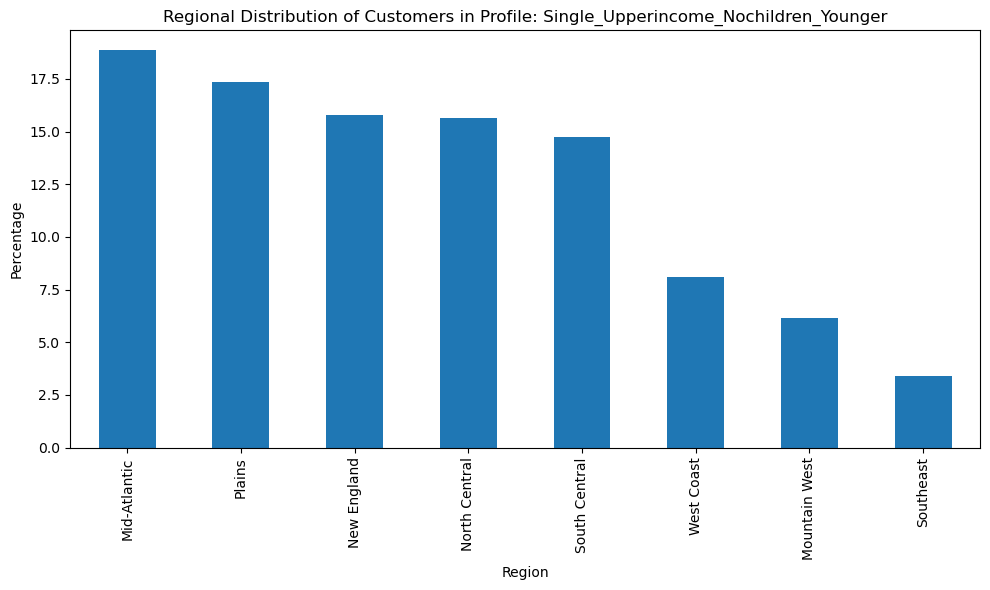

In [282]:
# Create a bar graph for regional distribution of customers in Single_Upperincome_Nochildren_Younger
plt.figure(figsize=(10, 6)) 
percentages.plot(kind='bar')

# Label the axes and title
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Regional Distribution of Customers in Profile: Single_Upperincome_Nochildren_Younger')

# Adjust the margins to create more space for y-axis labels
plt.subplots_adjust(left=0.3, right=0.8, top=0.9, bottom=0.3)

path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'
filename = 'Regional_dist_Single_Upperincome_Nochildren_Younger.png'

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Regional_dist_Single_Upperincome_Nochildren_Younger'))

# Show the plot
plt.tight_layout()
plt.show()

In [283]:
# Finding department_id numbers for Single_Upperincome_Nochildren_Younger
df_Single_Upperincome_Nochildren_Younger['department_id'].value_counts(dropna = False)

department_id
4     5330
16    3165
7     1482
3      916
13     915
1      912
19     894
17     627
5      469
9      385
20     383
15     381
12     364
14     331
6       86
18      71
11      63
2       14
8       14
21       4
10       3
Name: count, dtype: int64

In [317]:
# Finding department_id percentages for Single_Upperincome_Nochildren_Younger
total_rows = df_Single_Upperincome_Nochildren_Younger.shape[0]

In [318]:
percentages_as_decimals = df_Single_Upperincome_Nochildren_Younger['department_id'].value_counts(dropna = False) / total_rows

In [319]:
print(percentages_as_decimals)

department_id
4     0.317092
16    0.188292
7     0.088167
3     0.054495
13    0.054435
1     0.054257
19    0.053186
17    0.037301
5     0.027902
9     0.022904
20    0.022785
15    0.022666
12    0.021655
14    0.019692
6     0.005116
18    0.004224
11    0.003748
2     0.000833
8     0.000833
21    0.000238
10    0.000178
Name: count, dtype: float64


In [294]:
# Finding loyalty flag percentages for Single_Upperincome_Nochildren_Younger
total_rows = df_Single_Upperincome_Nochildren_Younger.shape[0]
percentages_as_decimals = df_Single_Upperincome_Nochildren_Younger['loyalty_flag'].value_counts(dropna=False) / total_rows
print(percentages_as_decimals)

loyalty_flag
Regular customer    0.451663
Loyal customer      0.433756
New customer        0.114581
Name: count, dtype: float64


In [309]:
# Finding price range percentages for Single_Upperincome_Nochildren_Younger
percentages_as_decimals = df_Single_Upperincome_Nochildren_Younger['price_range_loc'].value_counts(dropna = False) / total_rows
print(percentages_as_decimals)

price_range_loc
Mid-range product     0.694568
Low-range product     0.294307
High-range product    0.011125
Name: count, dtype: float64


In [291]:
# Finding average total per customer by Region
# Calculate the total amount paid for each order (price x order_number) using .loc
df_ords_prods_customers_filtered['total_amount_paid'] = df_ords_prods_customers_filtered['prices'] * df_ords_prods_customers_filtered['order_number']

# Group the DataFrame by 'Region' and 'user_id,' and calculate the sum of 'total_amount_paid'
average_total_amount_by_Region = df_ords_prods_customers_filtered.groupby(['Region', 'user_id'])['total_amount_paid'].sum()

# Group by 'Region' and calculate the mean of the sums for each user
average_total_amount_by_Region = average_total_amount_by_Region.groupby('Region').mean()

average_total_amount_by_Region

/var/folders/v0/xrbnqqfs3715z2hj7f5pvkf80000gn/T/ipykernel_2861/1505249089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_customers_filtered['total_amount_paid'] = df_ords_prods_customers_filtered['prices'] * df_ords_prods_customers_filtered['order_number']


Region
Mid-Atlantic     19187.615189
Mountain West    19576.750662
New England      19593.158251
North Central    18845.938697
Plains           19290.005133
South Central    19729.790096
Southeast        19972.246238
West Coast       20130.277354
Name: total_amount_paid, dtype: float64

In [292]:
# Find average prices paid by Region
# Group the DataFrame by Region and calculate the mean of 'Avg_price_paid'
average_price_by_Region = df_ords_prods_customers_filtered.groupby('Region')['Avg_price_paid'].mean()

average_price_by_Region

Region
Mid-Atlantic     10.926624
Mountain West    10.551351
New England      10.646368
North Central    10.707552
Plains           10.567985
South Central    10.107048
Southeast        10.898906
West Coast       10.464139
Name: Avg_price_paid, dtype: float64